# UAA/NKE Geolocation Research

# Part 1: Data Wrangling

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime, timedelta

# show the plots
%matplotlib inline
# show all columns
pd.set_option('display.max_columns', None)
# set the backgraound
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":24,"axes.labelsize":18,
                             "xtick.labelsize":15,"ytick.labelsize":15}) 

## 1. Geolocation (Customer Traffic)

### 1.1 Preparation 

In [2]:
ua = pd.read_csv('UA_Geo.csv')
nike = pd.read_csv('NIKE_Geo.csv')
ua.head()

,Unnamed: 0,UTCtimestamp,advertisingID,deviceLatitude,deviceLongitude,id,latitude,longitude
0,0,1514767636186,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62446,19,41.89269,-87.62455
1,1,1514766265060,7415AAF3-6878-4177-BB71-58C8ABD1A94E,41.89205,-87.62421,19,41.89269,-87.62455
2,2,1514767647000,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62449,19,41.89269,-87.62455
3,3,1514771519003,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33,36.05271,-115.16950
4,4,1514771522614,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33,36.05271,-115.16950


In [3]:
# drop repeated or independent features
ua.drop(['Unnamed: 0', 'latitude', 'longitude'], axis = 1, inplace = True)
nike.drop(['Unnamed: 0', 'latitude', 'longitude'], axis = 1, inplace = True)

In [4]:
print(ua.shape)
print(nike.shape)

(2873531, 5)
(2214794, 5)


In [5]:
ua.head()

,UTCtimestamp,advertisingID,deviceLatitude,deviceLongitude,id
0,1514767636186,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62446,19
1,1514766265060,7415AAF3-6878-4177-BB71-58C8ABD1A94E,41.89205,-87.62421,19
2,1514767647000,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62449,19
3,1514771519003,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33
4,1514771522614,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33


### 1.2 Plots of Geolocation Data

#### Data Manipulation

In [6]:
ua['time'] = pd.DatetimeIndex(pd.to_datetime(ua['UTCtimestamp'], unit = 'ms')).tz_localize('UTC') # convert
ua = ua.set_index('time')
ua.index = ua.index.tz_convert('America/New_York').tz_localize(None) # set the timezone EST
ua['ua_count'] = 1 # set a column for count
ua.head()

,UTCtimestamp,advertisingID,deviceLatitude,deviceLongitude,id,ua_count
time,,,,,,
2017-12-31 19:47:16.186,1514767636186,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62446,19,1
2017-12-31 19:24:25.060,1514766265060,7415AAF3-6878-4177-BB71-58C8ABD1A94E,41.89205,-87.62421,19,1
2017-12-31 19:47:27.000,1514767647000,772BA92E-F773-4EEB-9C56-48B64B833DCF,41.89330,-87.62449,19,1
2017-12-31 20:51:59.003,1514771519003,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33,1
2017-12-31 20:52:02.614,1514771522614,7DC33D5D-7902-4AB7-AB59-E569A87A2FD7,36.05305,-115.16940,33,1


In [7]:
ua.tail()

,UTCtimestamp,advertisingID,deviceLatitude,deviceLongitude,id,ua_count
time,,,,,,
2018-06-17 18:16:31.948,1529273791948,9943E1E9-379E-4E9F-BA98-47538C230217,29.92388,-81.41736,14,1
2018-06-17 18:37:48.617,1529275068617,64362F68-8DEC-4624-BCF2-C51D2038BFA3,29.92456,-81.41754,14,1
2018-06-17 18:37:56.000,1529275076000,64362F68-8DEC-4624-BCF2-C51D2038BFA3,29.92429,-81.41711,14,1
2018-06-17 19:03:38.448,1529276618448,61F4FB1B-8FC3-4EFF-B9B1-1886211CC9B3,29.92470,-81.41756,14,1
2018-06-17 19:46:07.050,1529279167050,AE78F1CF-C113-41C8-8F28-3BFC0E2F1A0E,29.92455,-81.41660,14,1


In [8]:
ua = ua['2018'] # keep data in 2018
ua.shape

(2870757, 6)

In [9]:
nike['time'] = pd.DatetimeIndex(pd.to_datetime(nike['UTCtimestamp'], unit='ms')).tz_localize('UTC')
nike = nike.set_index('time')
nike['nike_count'] = 1
nike.index = nike.index.tz_convert('America/New_York').tz_localize(None)
nike = nike['2018']
nike.shape

(2212528, 6)

#### 30-min Geolocation Plot

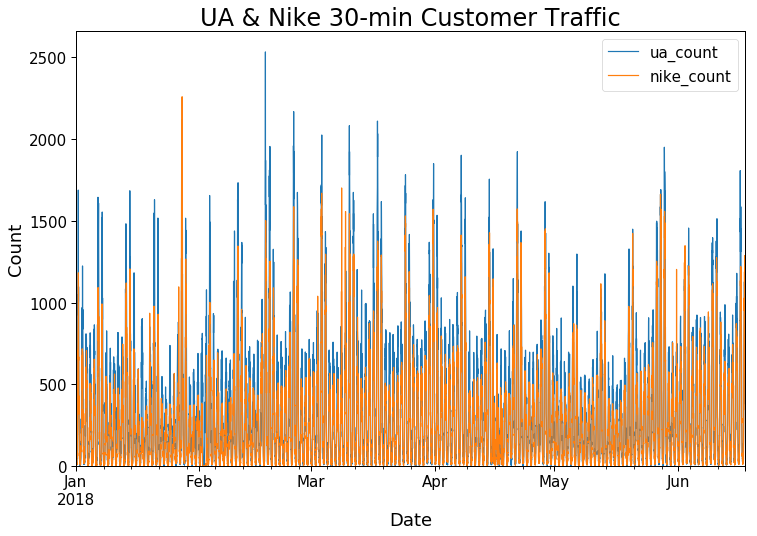

In [10]:
figure(figsize = (12,8)) # set figure size

ua['ua_count'].resample('30T').sum().plot() # set a unit for 30 minutes
nike['nike_count'].resample('30T').sum().plot()

plt.title('UA & Nike 30-min Customer Traffic')
plt.ylabel('Count')
plt.xlabel('Date')
plt.legend(loc=1, prop={'size': 15})
plt.ylim(bottom=0) 

plt.show()

#### 3-hour Geolocation Plot

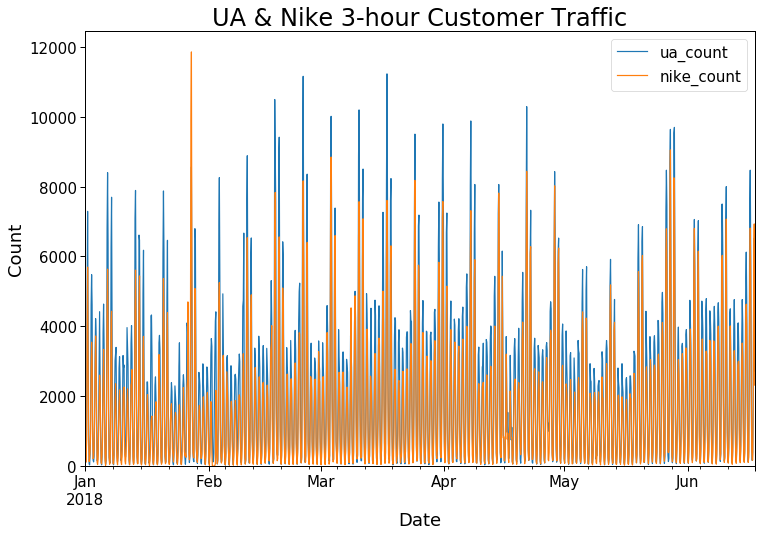

In [11]:
figure(figsize = (12,8))

ua['ua_count'].resample('3H').sum().plot() # set a unit for 3 hours
nike['nike_count'].resample('3H').sum().plot()

plt.title('UA & Nike 3-hour Customer Traffic')
plt.ylabel('Count')
plt.xlabel('Date')
plt.legend(loc=1, prop={'size': 15})
plt.ylim(bottom=0) 

plt.show()

#### Daily Geolocation Plot

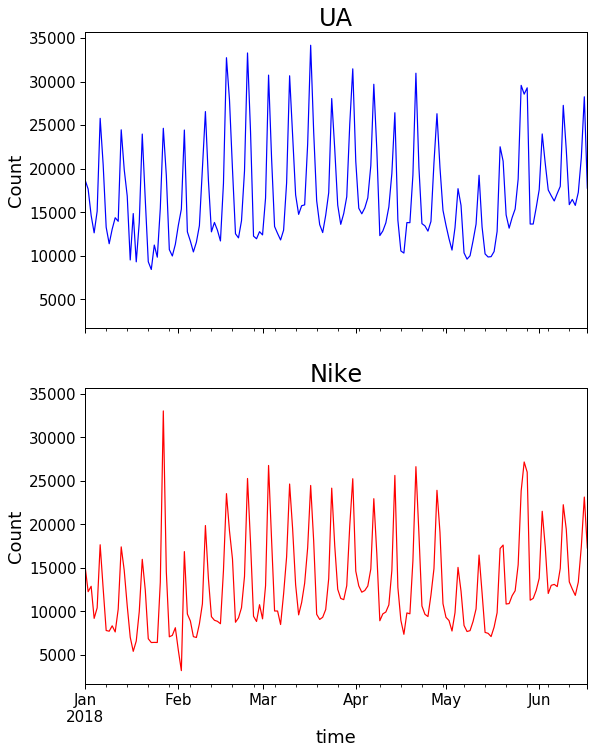

In [12]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(9,12)) # share x-axis & y-axis

ua['ua_count'].resample('D').sum().plot(color='blue', ax=ax[0]) # create daily gap
nike['nike_count'].resample('D').sum().plot(color='red', ax=ax[1])
 
ax[0].set_title('UA')
ax[1].set_title('Nike')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')

plt.show()

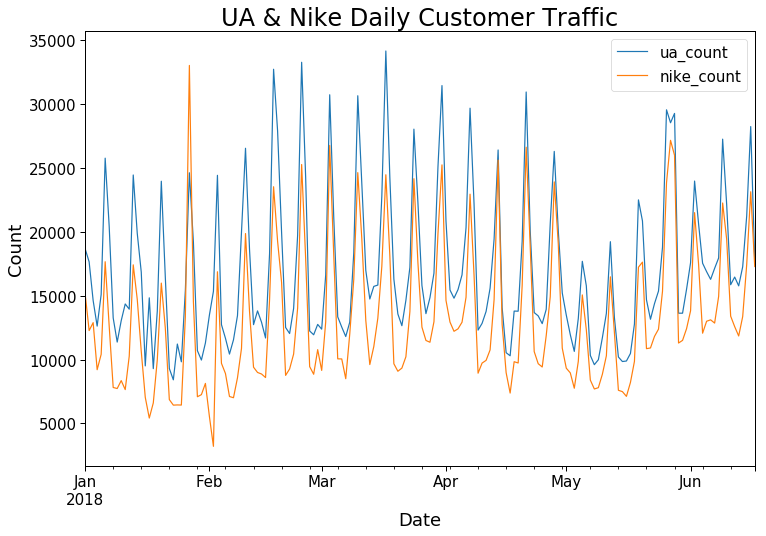

In [13]:
figure(figsize = (12,8))

ua['ua_count'].resample('D').sum().plot()
nike['nike_count'].resample('D').sum().plot()
plt.title('UA & Nike Daily Customer Traffic')

plt.ylabel('Count')
plt.xlabel('Date')
plt.legend(loc=1, prop={'size': 15})

plt.show()

#### Weekly Geolocation Plot

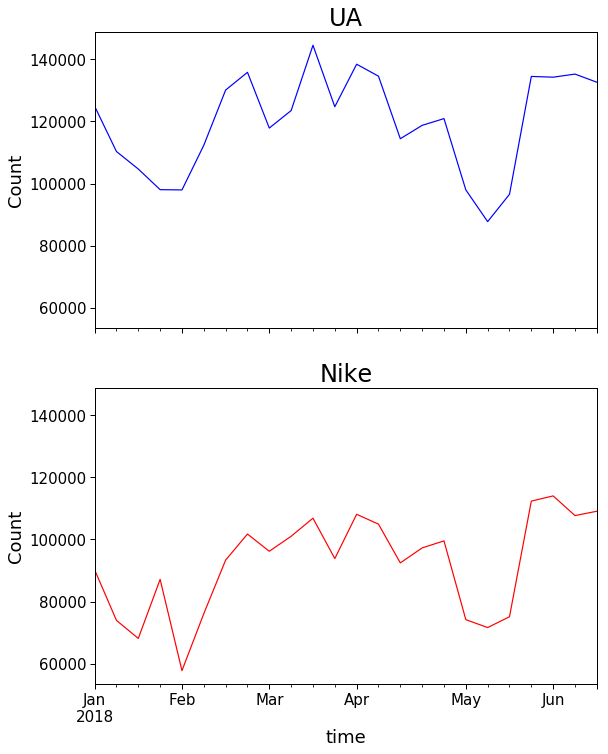

In [14]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(9, 12))

ua['ua_count'].resample('W').sum().plot(color = 'blue', ax=ax[0])
nike['nike_count'].resample('W').sum().plot(color = 'red', ax=ax[1])

ax[0].set_title('UA')
ax[1].set_title('Nike')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')

plt.show()

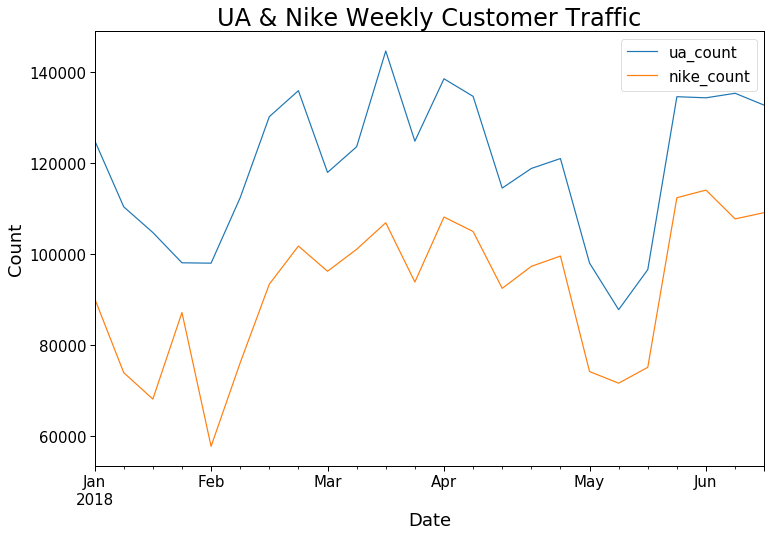

In [15]:
figure(figsize = (12,8))
ua['ua_count'].resample('W').sum().plot()
nike['nike_count'].resample('W').sum().plot()
plt.title('UA & Nike Weekly Customer Traffic')
plt.ylabel('Count')
plt.xlabel('Date')
plt.legend(loc=1, prop={'size': 15})
plt.show()

## 2. Stock & Twitter Data

### 2.1 Preparation

In [16]:
uatwt_stk = pd.read_csv('UA_Tweet.csv', parse_dates=['Date'], index_col='Date').sort_index()['2018-01-01':'2018-06-17']
uatwt_stk.head()

,Lst Trd/Lst Px,Volume,Twttr Sent,Twttr Sent(Real time),Twttr Pub Cnt,Twttr Neut Sent
Date,,,,,,
2018-01-02 04:00:00,NaN,NaN,NaN,0.0000,NaN,NaN
2018-01-02 05:00:00,NaN,NaN,NaN,0.0732,3.0,1.0
2018-01-02 05:30:00,NaN,NaN,NaN,0.0000,NaN,NaN
2018-01-02 06:30:00,NaN,NaN,NaN,NaN,1.0,1.0
2018-01-02 07:00:00,NaN,NaN,NaN,NaN,4.0,4.0


In [17]:
niketwt_stk = pd.read_csv('NIKE_Tweet.csv', parse_dates=['Date'], index_col='Date').sort_index()['2018-01-01':'2018-06-17']
niketwt_stk.tail()

,Lst Trd/Lst Px,Volume,Twttr Sent,Twttr Sent(Real time),Twttr Pub Cnt,Twttr Neut Sent
Date,,,,,,
2018-06-15 17:30:00,75.99,600,75.99,NaN,6.0,6.0
2018-06-15 18:00:00,NaN,NaN,NaN,0.0899,7.0,4.0
2018-06-15 18:30:00,75.84,0,75.84,0.0000,2.0,2.0
2018-06-15 19:00:00,NaN,NaN,NaN,-0.0549,6.0,2.0
2018-06-15 19:30:00,75.84,300,75.84,0.0000,8.0,8.0


In [18]:
print(uatwt_stk.Volume.dtype)
print(niketwt_stk.Volume.dtype)

object
object


In [19]:
uatwt_stk.Volume.str.extract('([a-zA-Z])', expand=False).value_counts()

k    1477
M     122
Name: Volume, dtype: int64

In [20]:
niketwt_stk.Volume.str.extract('([a-zA-Z])', expand=False).value_counts()

k    1497
M     125
Name: Volume, dtype: int64

In [21]:
# adjust the units of Volume
ua_num = uatwt_stk.Volume.str.extract('(\d+(\.\d+)?)', expand=False).iloc[:,0].astype('float64') # get number
ua_unit = uatwt_stk.Volume.str.extract('([a-zA-Z])', expand=False) # get unit
ua_unit = np.where(ua_unit=='M', 1000000, np.where(ua_unit=='k', 1000, np.where(np.isnan(ua_num), 0, 1)))
uatwt_stk.Volume = ua_num * ua_unit

nike_num = niketwt_stk.Volume.str.extract('(\d+(\.\d+)?)', expand=False).iloc[:,0].astype('float64')
nike_unit = niketwt_stk.Volume.str.extract('([a-zA-Z])', expand=False)
nike_unit = np.where(nike_unit=='M', 1000000, np.where(nike_unit=='k', 1000, np.where(np.isnan(nike_num), 0, 1)))
niketwt_stk.Volume = nike_num * nike_unit

print(uatwt_stk.Volume.dtype)
print(niketwt_stk.Volume.dtype)

float64
float64


In [22]:
print(uatwt_stk.shape)
print(niketwt_stk.shape)

(3460, 6)
(3624, 6)


In [23]:
uatwt_stk.rename(columns = {'Twttr Sent(Real time)':'ua_tweet',
                            'Lst Trd/Lst Px':'ua_price',
                            'Volume':'ua_stkv',
                            'Twttr Pub Cnt':'ua_twtcount'}, 
                 inplace = True)

niketwt_stk.rename(columns = {'Twttr Sent(Real time)':'nike_tweet',
                              'Lst Trd/Lst Px':'nike_price',
                              'Volume':'nike_stkv',
                              'Twttr Pub Cnt':'nike_twtcount'}, 
                 inplace = True)

In [24]:
uatwt_stk.head()

,ua_price,ua_stkv,Twttr Sent,ua_tweet,ua_twtcount,Twttr Neut Sent
Date,,,,,,
2018-01-02 04:00:00,NaN,NaN,NaN,0.0000,NaN,NaN
2018-01-02 05:00:00,NaN,NaN,NaN,0.0732,3.0,1.0
2018-01-02 05:30:00,NaN,NaN,NaN,0.0000,NaN,NaN
2018-01-02 06:30:00,NaN,NaN,NaN,NaN,1.0,1.0
2018-01-02 07:00:00,NaN,NaN,NaN,NaN,4.0,4.0


In [25]:
niketwt_stk.head()

,nike_price,nike_stkv,Twttr Sent,nike_tweet,nike_twtcount,Twttr Neut Sent
Date,,,,,,
2018-01-02 04:00:00,NaN,NaN,NaN,NaN,5.0,5.0
2018-01-02 04:30:00,NaN,NaN,NaN,NaN,2.0,2.0
2018-01-02 05:00:00,62.36,641.0,62.36,NaN,4.0,4.0
2018-01-02 05:30:00,NaN,NaN,NaN,NaN,1.0,1.0
2018-01-02 06:00:00,NaN,NaN,NaN,NaN,13.0,13.0


### 2.2 Twitter

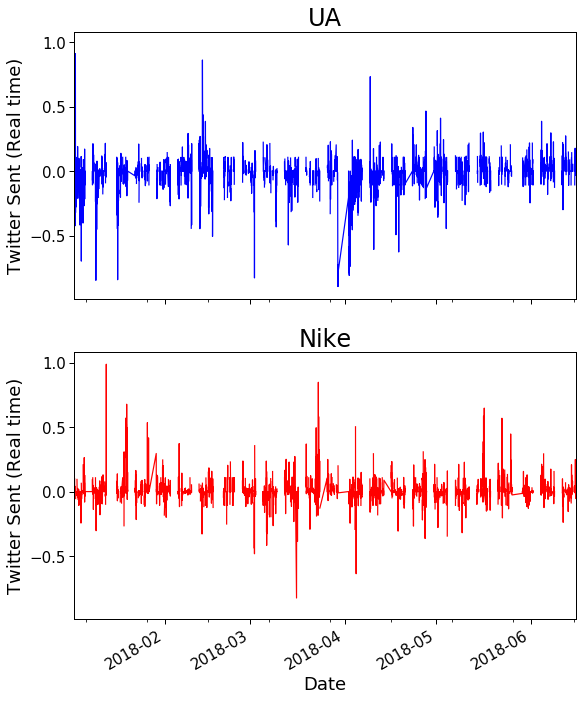

In [26]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(9, 12))

uatwt_stk['ua_tweet'].plot(color='blue', ax=ax[0])
niketwt_stk['nike_tweet'].plot(color='red', ax=ax[1])

ax[0].set_title('UA')
ax[1].set_title('Nike')
ax[0].set_ylabel('Twitter Sent (Real time)')
ax[1].set_ylabel('Twitter Sent (Real time)')

plt.show()

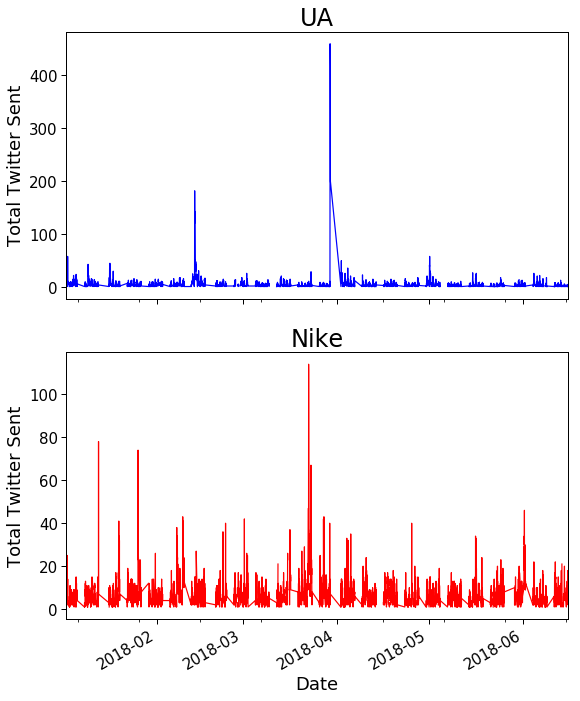

In [27]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(9, 12))

uatwt_stk['ua_twtcount'].plot(color='blue', ax=ax[0])
niketwt_stk['nike_twtcount'].plot(color='red', ax=ax[1])

ax[0].set_title('UA')
ax[1].set_title('Nike')
ax[0].set_ylabel('Total Twitter Sent')
ax[1].set_ylabel('Total Twitter Sent')

plt.show()

### 2.3 Stock

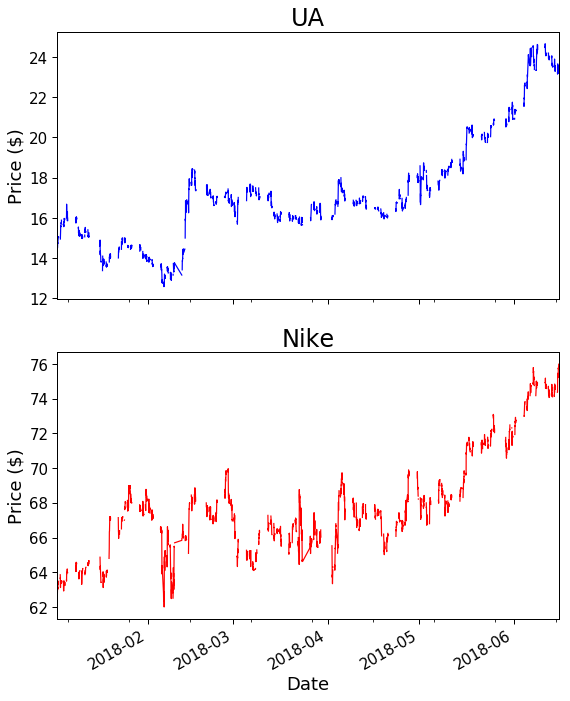

In [28]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(9, 12))

uatwt_stk['ua_price'].plot(color='blue', ax=ax[0])
niketwt_stk['nike_price'].plot(color='red', ax=ax[1])

ax[0].set_title('UA')
ax[1].set_title('Nike')
ax[0].set_ylabel('Price ($)')
ax[1].set_ylabel('Price ($)')

plt.show()

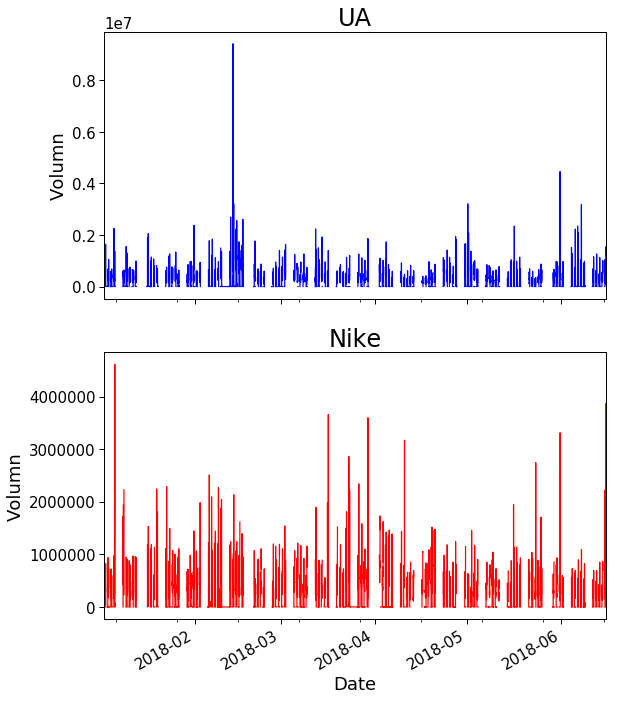

In [29]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(9, 12))

uatwt_stk['ua_stkv'].plot(color='blue', ax=ax[0])
niketwt_stk['nike_stkv'].plot(color='red', ax=ax[1])

ax[0].set_title('UA')
ax[1].set_title('Nike')
ax[0].set_ylabel('Volumn')
ax[1].set_ylabel('Volumn')

plt.show()

## 3. Putting All Features Together

### 3.1 Create a New Dataset

In [30]:
alldata = pd.concat([ua['ua_count'].resample('30T').sum(), 
                    nike['nike_count'].resample('30T').sum(),
                    uatwt_stk['ua_price'], niketwt_stk['nike_price'],
                    uatwt_stk['ua_stkv'],niketwt_stk['nike_stkv'],
                    uatwt_stk['ua_tweet'],niketwt_stk['nike_tweet'],
                    uatwt_stk['ua_twtcount'],niketwt_stk['nike_twtcount']
                   ], axis=1)

alldata = alldata['2018'] # just use data in 2018

In [31]:
alldata.shape

(8056, 10)

In [32]:
alldata.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount
2018-01-01 00:00:00,75,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:30:00,89,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,100,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 01:30:00,107,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,131,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
alldata.tail()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount
2018-06-17 17:30:00,1015,940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-17 18:00:00,874,874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-17 18:30:00,724,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-17 19:00:00,740,436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-17 19:30:00,382,346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
alldata.index.name = 'time'
alldata['count_ratio'] = alldata['ua_count'] / alldata['nike_count']
alldata['price_ratio'] = alldata['ua_price'] / alldata['nike_price']
alldata['tweet_diff'] = alldata['ua_tweet'] - alldata['nike_tweet']
alldata['stkv_ratio'] = alldata['ua_stkv'] / alldata['nike_stkv']
alldata['twtcount_ratio'] = alldata['ua_twtcount'] / alldata['nike_twtcount']
alldata.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,count_ratio,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio
time,,,,,,,,,,,,,,,
2018-01-01 00:00:00,75,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.681818,NaN,NaN,NaN,NaN
2018-01-01 00:30:00,89,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.435484,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,100,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.564103,NaN,NaN,NaN,NaN
2018-01-01 01:30:00,107,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.320988,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,131,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.336735,NaN,NaN,NaN,NaN


In [35]:
alldata.shape

(8056, 15)

In [36]:
alldata.to_csv("alldata.csv", sep=',')

In [37]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8056 entries, 2018-01-01 00:00:00 to 2018-06-17 19:30:00
Data columns (total 15 columns):
ua_count          8056 non-null int64
nike_count        8056 non-null int64
ua_price          2352 non-null float64
nike_price        2534 non-null float64
ua_stkv           2352 non-null float64
nike_stkv         2534 non-null float64
ua_tweet          2297 non-null float64
nike_tweet        2495 non-null float64
ua_twtcount       3250 non-null float64
nike_twtcount     3523 non-null float64
count_ratio       8053 non-null float64
price_ratio       2142 non-null float64
tweet_diff        1649 non-null float64
stkv_ratio        2031 non-null float64
twtcount_ratio    3174 non-null float64
dtypes: float64(13), int64(2)
memory usage: 1007.0 KB


### 3.2 Using the Dataset

In [38]:
alldata = pd.read_csv('alldata.csv', parse_dates=['time'], index_col='time')
alldata.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,count_ratio,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio
time,,,,,,,,,,,,,,,
2018-01-01 00:00:00,75,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.681818,NaN,NaN,NaN,NaN
2018-01-01 00:30:00,89,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.435484,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,100,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.564103,NaN,NaN,NaN,NaN
2018-01-01 01:30:00,107,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.320988,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,131,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.336735,NaN,NaN,NaN,NaN


#### 30-min Data Plots

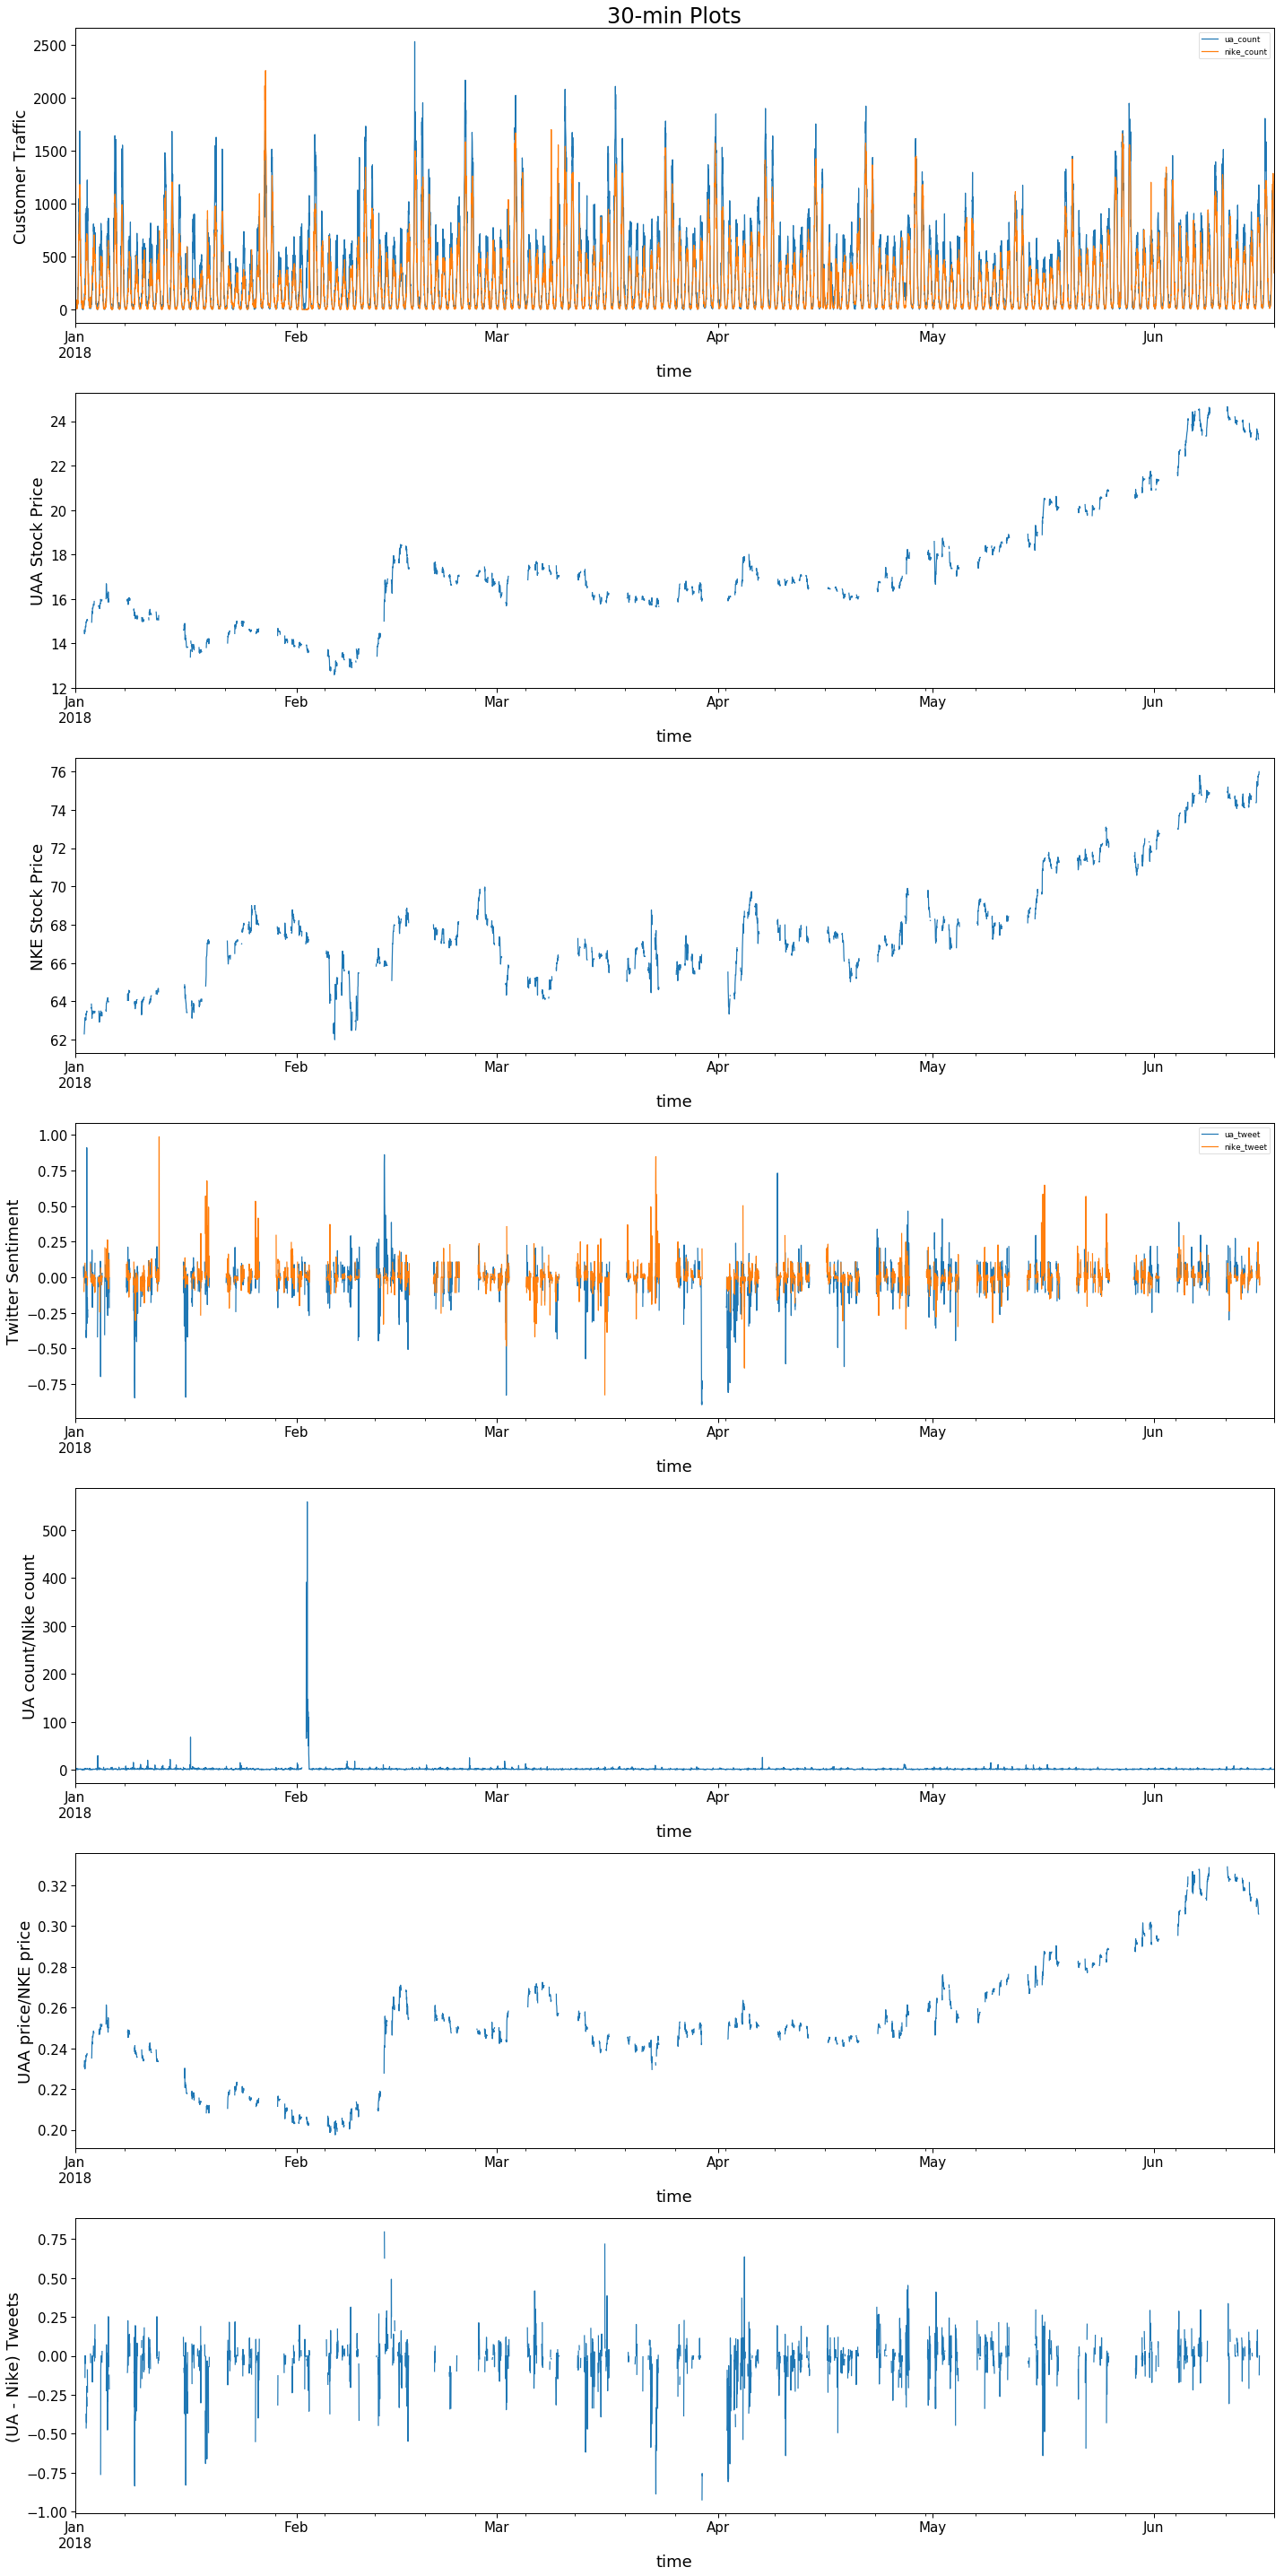

In [39]:
fig=plt.figure(figsize=(20,40))

axes1=fig.add_subplot(7,1,1)
alldata[['ua_count','nike_count']].plot(ax=axes1)

axes2=fig.add_subplot(7,1,2)
alldata['ua_price'].plot(ax=axes2)

axes3=fig.add_subplot(7,1,3)
alldata['nike_price'].plot(ax=axes3)

axes4=fig.add_subplot(7,1,4)
alldata[['ua_tweet', 'nike_tweet']].plot(ax=axes4)

axes5=fig.add_subplot(7,1,5)
alldata['count_ratio'].plot(ax=axes5)

axes6=fig.add_subplot(7,1,6)
alldata['price_ratio'].plot(ax=axes6)

axes7=fig.add_subplot(7,1,7)
alldata['tweet_diff'].plot(ax=axes7)

axes1.set_ylabel('Customer Traffic')
axes2.set_ylabel('UAA Stock Price')
axes3.set_ylabel('NKE Stock Price')
axes4.set_ylabel('Twitter Sentiment')
axes5.set_ylabel('UA count/Nike count')
axes6.set_ylabel('UAA price/NKE price')
axes7.set_ylabel('(UA - Nike) Tweets')

axes1.set_title('30-min Plots')

plt.tight_layout()  

#### Hourly Data Plots

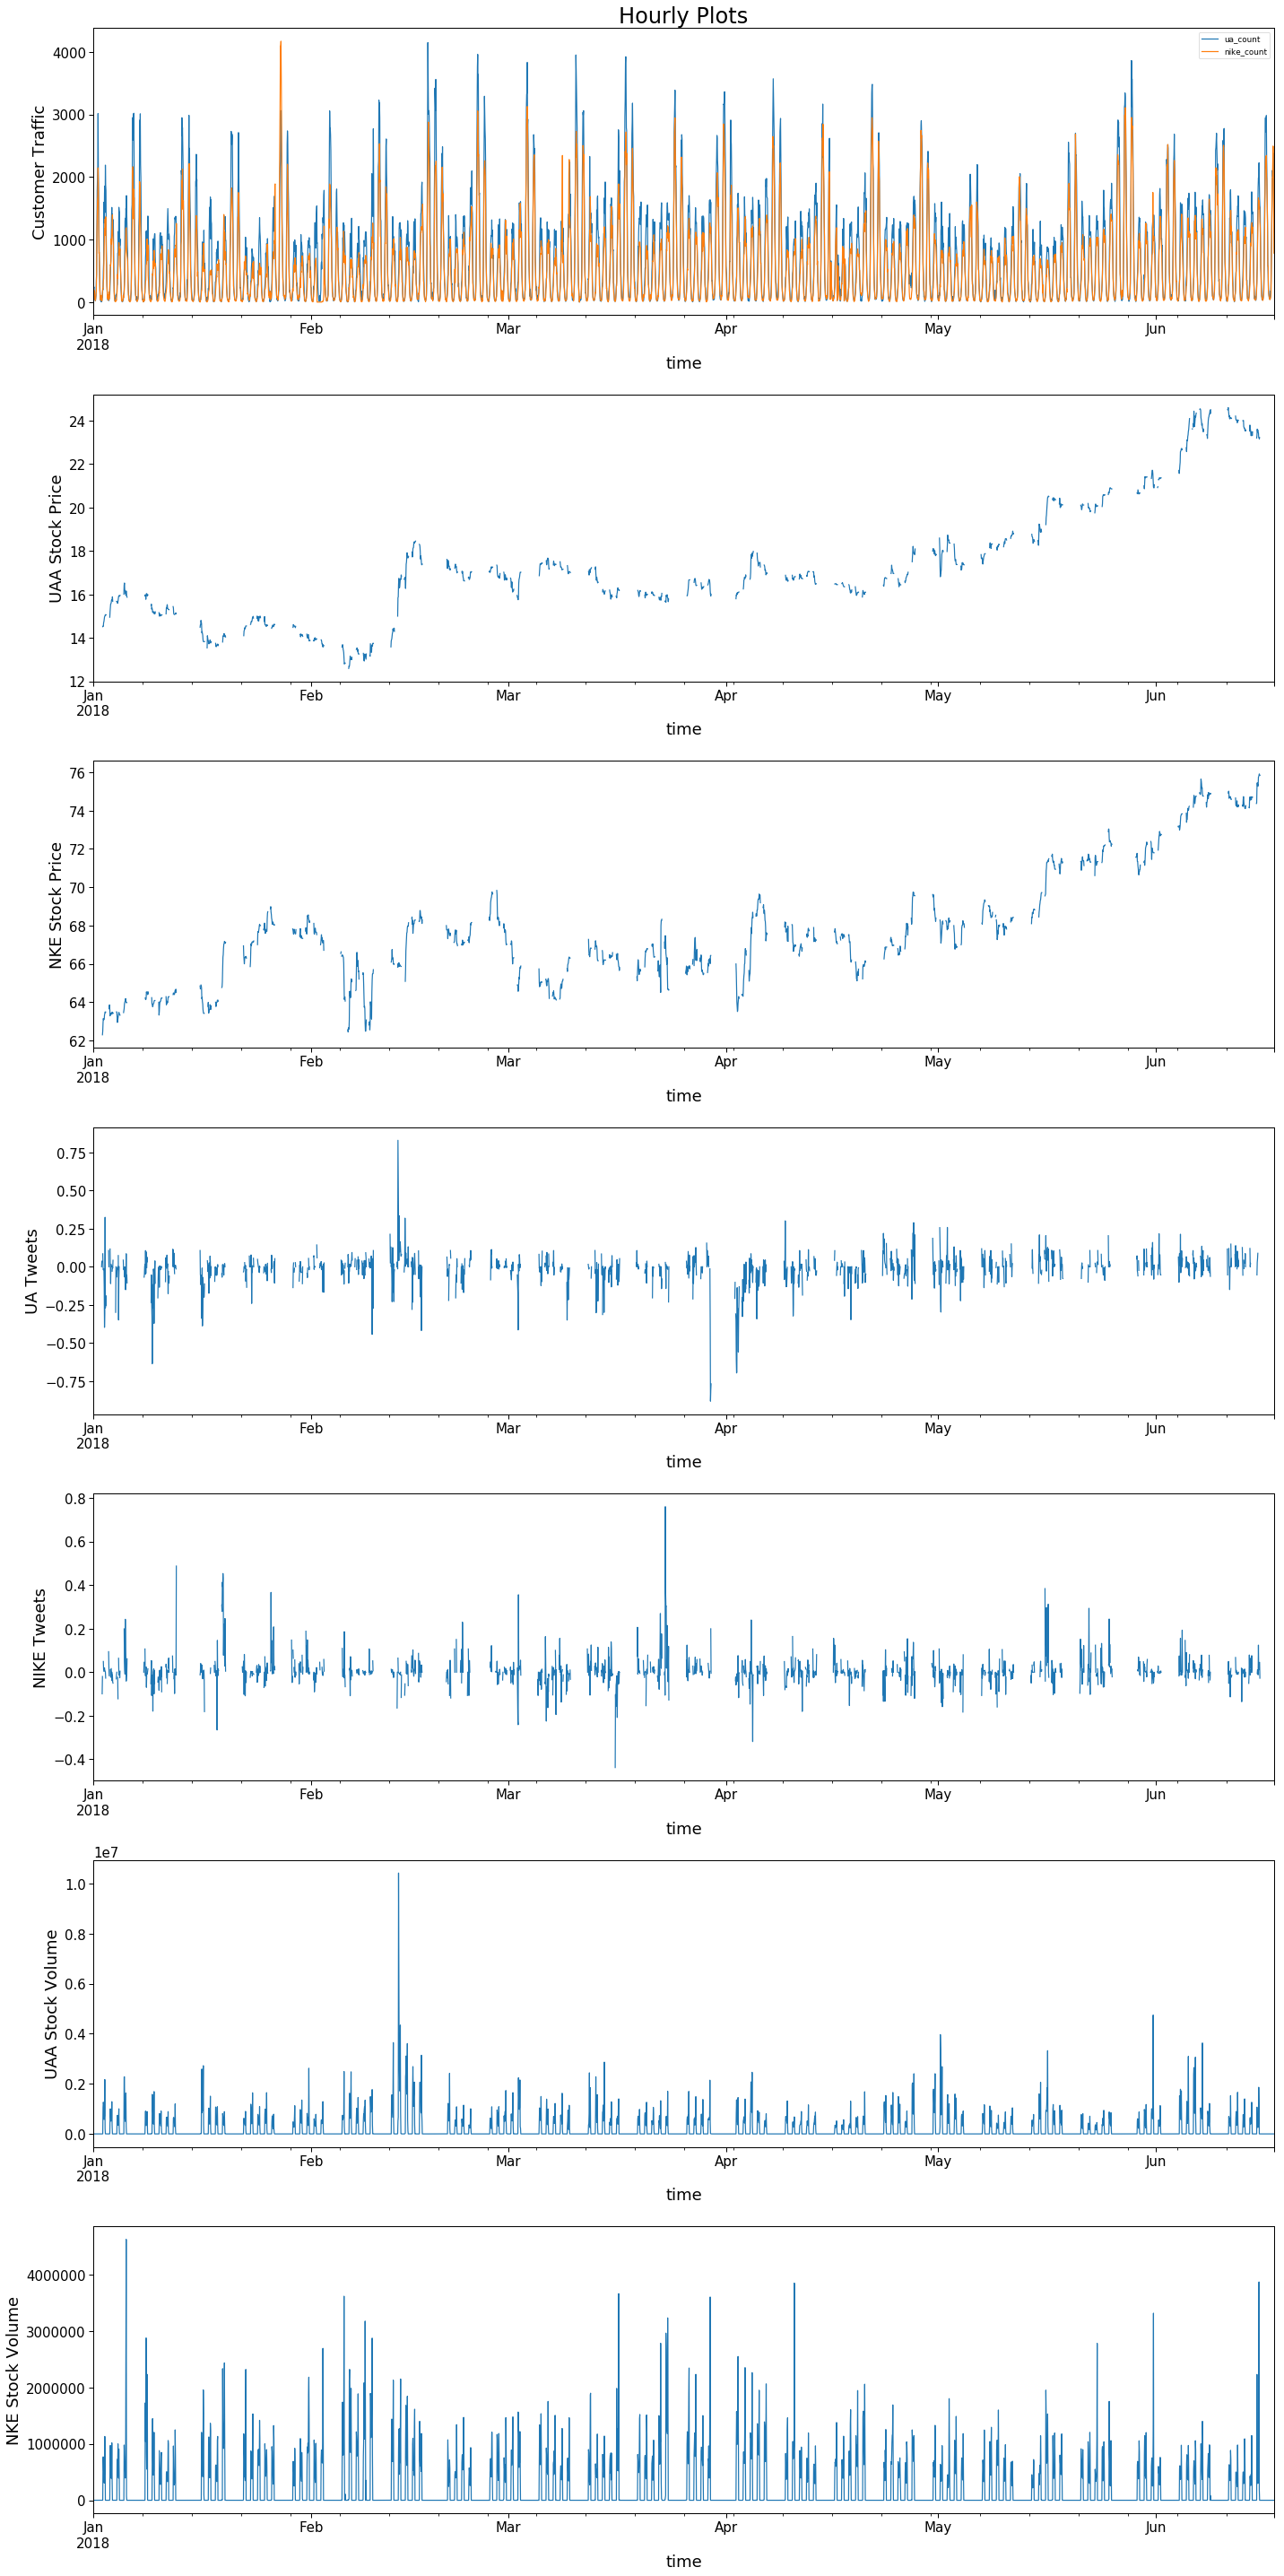

In [40]:
fig=plt.figure(figsize=(20,40))

axes1=fig.add_subplot(7,1,1)
alldata[['ua_count','nike_count']].resample('H').sum().plot(ax=axes1)

axes2=fig.add_subplot(7,1,2)
alldata['ua_price'].resample('H').mean().plot(ax=axes2)

axes3=fig.add_subplot(7,1,3)
alldata['nike_price'].resample('H').mean().plot(ax=axes3)

axes4=fig.add_subplot(7,1,4)
alldata['ua_tweet'].resample('H').mean().plot(ax=axes4)

axes5=fig.add_subplot(7,1,5)
alldata['nike_tweet'].resample('H').mean().plot(ax=axes5)

axes6=fig.add_subplot(7,1,6)
alldata['ua_stkv'].resample('H').sum().plot(ax=axes6)

axes7=fig.add_subplot(7,1,7)
alldata['nike_stkv'].resample('H').sum().plot(ax=axes7)

axes1.set_ylabel('Customer Traffic')
axes2.set_ylabel('UAA Stock Price')
axes3.set_ylabel('NKE Stock Price')
axes4.set_ylabel('UA Tweets')
axes5.set_ylabel('NIKE Tweets')
axes6.set_ylabel('UAA Stock Volume')
axes7.set_ylabel('NKE Stock Volume')

axes1.set_title('Hourly Plots')

plt.tight_layout()

# Part 2: Machine Learning

## 4.1 Data Understanding

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, TimeSeriesSplit, RepeatedKFold
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [42]:
total = pd.read_csv('alldata.csv', parse_dates=['time'], index_col='time')
total.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,count_ratio,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio
time,,,,,,,,,,,,,,,
2018-01-01 00:00:00,75,110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.681818,NaN,NaN,NaN,NaN
2018-01-01 00:30:00,89,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.435484,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,100,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.564103,NaN,NaN,NaN,NaN
2018-01-01 01:30:00,107,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.320988,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,131,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.336735,NaN,NaN,NaN,NaN


### Transform the original 30-min data to hourly data

In [43]:
count = total[['ua_count','nike_count']].resample('H').sum()
price = total[['ua_price','nike_price']].resample('H').last()
stkv = total[['ua_stkv','nike_stkv']].resample('H').sum()
tweet = total[['ua_tweet','nike_tweet']].resample('H').mean()
twtcount = total[['ua_twtcount','nike_twtcount']].resample('H').sum()
total = pd.concat([count, price, stkv, tweet, twtcount], axis = 1)
total.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount
time,,,,,,,,,,
2018-01-01 00:00:00,164,172,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0
2018-01-01 01:00:00,207,120,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0
2018-01-01 02:00:00,243,195,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0
2018-01-01 03:00:00,114,139,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0
2018-01-01 04:00:00,90,173,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0


In [44]:
total['count_ratio'] = total.ua_count / total.nike_count
total['price_ratio'] = total.ua_price / total.nike_price
total['tweet_diff'] = total.ua_tweet - total.nike_tweet
total['stkv_ratio'] = total.ua_stkv / total.nike_stkv
total['twtcount_ratio'] = total.ua_twtcount / total.nike_twtcount
total.head()

,ua_count,nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,count_ratio,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio
time,,,,,,,,,,,,,,,
2018-01-01 00:00:00,164,172,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.953488,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,207,120,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,1.725000,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,243,195,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,1.246154,NaN,NaN,NaN,NaN
2018-01-01 03:00:00,114,139,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.820144,NaN,NaN,NaN,NaN
2018-01-01 04:00:00,90,173,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.520231,NaN,NaN,NaN,NaN


### Plot the hourly data

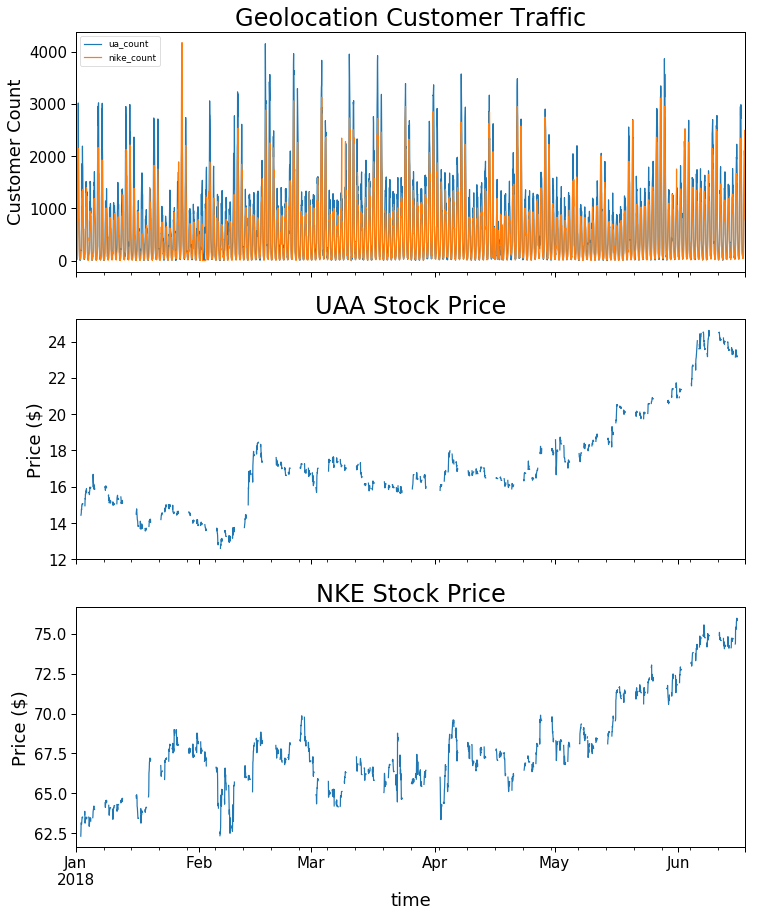

In [45]:
fig, ax = plt.subplots(3, 1, sharex = True, figsize = (12, 15))

total[['ua_count','nike_count']].plot(ax = ax[0])
total['ua_price'].plot(ax = ax[1])
total['nike_price'].plot(ax = ax[2])

ax[0].set_title('Geolocation Customer Traffic')
ax[1].set_title('UAA Stock Price')
ax[2].set_title('NKE Stock Price')

ax[0].set_ylabel('Customer Count')
ax[1].set_ylabel('Price ($)')
ax[2].set_ylabel('Price ($)')

plt.show()

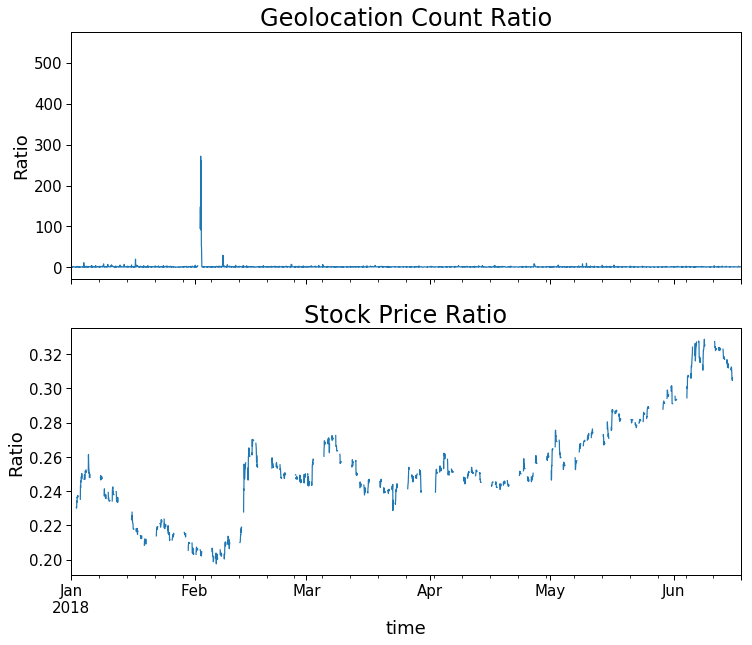

In [46]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (12, 10))

total['count_ratio'].plot(ax = ax[0])
total['price_ratio'].plot(ax = ax[1])

ax[0].set_title('Geolocation Count Ratio')
ax[1].set_title('Stock Price Ratio')

ax[0].set_ylabel('Ratio')
ax[1].set_ylabel('Ratio')

plt.show()

#### Rolling Windows

In [47]:
total = total.rolling(min_periods=1, window=3, center=False).mean() # rolling analysis

In [48]:
total.shape

(4028, 15)

## 4.2 Feature Engineering

In [49]:
# create labels for classification (results for tomorrow)
value_ua = total.ua_price.shift(-1) - total.ua_price
value_nike = total.nike_price.shift(-1) - total.nike_price
value_ratio = total.price_ratio.shift(-1) - total.price_ratio

value_ua = np.where(value_ua>=0, 1, 0)
value_nike = np.where(value_nike>=0, 1, 0)
value_ratio = np.where(value_ratio>=0, 1, 0)

print(value_ua.shape)
print(value_nike.shape)
print(value_ratio.shape)

(4028,)
(4028,)
(4028,)


In [50]:
total = total.rename(columns={
    'ua_count':'geo_ua_count',
    'nike_count':'geo_nike_count',
    'count_ratio':'geo_count_ratio'
})

# add rate of returns
return_ua = total.ua_price/total.ua_price.shift(1) - 1
return_nike = total.nike_price/total.nike_price.shift(1) - 1
return_diff = return_ua - return_nike

# add labels and rate of returns to the dataframe
total['return_ua'] = return_ua
total['return_nike'] = return_nike
total['return_diff'] = return_diff
total['value_ua'] = value_ua
total['value_nike'] = value_nike
total['value_ratio'] = value_ratio

total[['ua_tweet','nike_tweet','tweet_diff']] = total[['ua_tweet','nike_tweet','tweet_diff']].fillna(method = 'bfill')

In [51]:
print(total.shape)
print(total.dropna().shape)

(4028, 21)
(1345, 21)


#### Outliers Elimination

In [52]:
def outlier_eliminate(df):
    s_mean = df.replace([np.inf, -np.inf], np.nan).dropna().mean(axis = 0)
    s_std = df.replace([np.inf, -np.inf], np.nan).dropna().std(axis = 0)
    Q1 = s_mean - 3 * s_std
    Q2 = s_mean + 3 * s_std
    return df[~((df < Q1) | (df > Q2)).any(axis = 1)]

In [53]:
total = outlier_eliminate(total)
total.shape

(3562, 21)

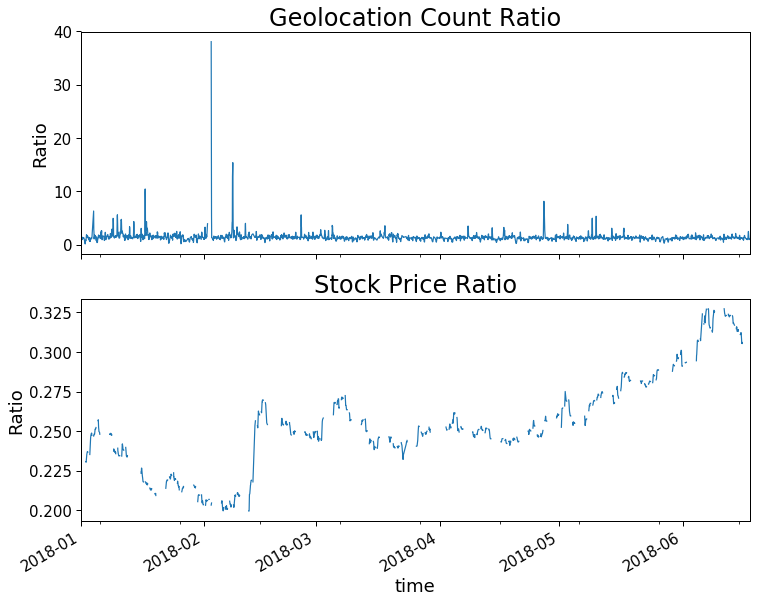

In [54]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (12, 10))

total['geo_count_ratio'].plot(ax = ax[0])
total['price_ratio'].plot(ax = ax[1])

ax[0].set_title('Geolocation Count Ratio')
ax[1].set_title('Stock Price Ratio')

ax[0].set_ylabel('Ratio')
ax[1].set_ylabel('Ratio')

plt.show()

In [55]:
total.dropna(inplace = True)
total.head()

,geo_ua_count,geo_nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,geo_count_ratio,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio,return_ua,return_nike,return_diff,value_ua,value_nike,value_ratio
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 09:00:00,159.666667,200.000000,14.465000,62.626667,3.533980e+05,257339.000000,0.042650,-0.019500,4.666667,10.666667,0.772090,0.230372,-0.069350,0.992635,0.471861,0.002426,0.003150,-0.000725,1,1,0
2018-01-02 10:00:00,296.666667,256.666667,14.491667,62.910000,7.750293e+05,512546.000000,0.021783,0.049400,4.666667,12.000000,1.101082,0.230356,-0.069350,1.542621,0.385281,0.001844,0.004524,-0.002681,1,1,1
2018-01-02 11:00:00,439.666667,308.666667,14.605000,63.070000,1.171964e+06,684602.000000,-0.011000,0.030300,10.000000,12.333333,1.353246,0.231569,-0.046800,1.775936,0.822150,0.007821,0.002543,0.005277,1,1,1
2018-01-02 12:00:00,906.000000,452.666667,14.681667,63.086667,1.012648e+06,586553.333333,-0.017100,0.021633,10.666667,13.333333,1.870221,0.232723,-0.038733,1.724140,0.836156,0.005249,0.000264,0.004985,1,1,1
2018-01-02 13:00:00,1164.666667,676.333333,14.816667,63.103333,7.855340e+05,433096.000000,-0.054733,0.007750,14.000000,20.000000,1.802806,0.234799,-0.023425,1.809314,0.845931,0.009195,0.000264,0.008931,1,1,1


In [56]:
total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1207 entries, 2018-01-02 09:00:00 to 2018-06-15 20:00:00
Data columns (total 21 columns):
geo_ua_count       1207 non-null float64
geo_nike_count     1207 non-null float64
ua_price           1207 non-null float64
nike_price         1207 non-null float64
ua_stkv            1207 non-null float64
nike_stkv          1207 non-null float64
ua_tweet           1207 non-null float64
nike_tweet         1207 non-null float64
ua_twtcount        1207 non-null float64
nike_twtcount      1207 non-null float64
geo_count_ratio    1207 non-null float64
price_ratio        1207 non-null float64
tweet_diff         1207 non-null float64
stkv_ratio         1207 non-null float64
twtcount_ratio     1207 non-null float64
return_ua          1207 non-null float64
return_nike        1207 non-null float64
return_diff        1207 non-null float64
value_ua           1207 non-null int64
value_nike         1207 non-null int64
value_ratio        1207 non-null int64
dt

In [57]:
total.describe()

,geo_ua_count,geo_nike_count,ua_price,nike_price,ua_stkv,nike_stkv,ua_tweet,nike_tweet,ua_twtcount,nike_twtcount,geo_count_ratio,price_ratio,tweet_diff,stkv_ratio,twtcount_ratio,return_ua,return_nike,return_diff,value_ua,value_nike,value_ratio
count,1207.000000,1207.000000,1207.000000,1207.000000,1.207000e+03,1.207000e+03,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1.207000e+03,1207.000000,1.207000e+03,1207.000000,1207.000000,1207.000000,1207.000000
mean,921.262082,674.578293,17.405823,67.898328,4.766537e+05,5.316319e+05,-0.011667,0.002506,10.021541,14.333333,1.467829,0.255298,-0.015250,2.124769,8.715727e-01,0.000064,8.046177e-05,-0.000017,0.536868,0.534383,0.467274
std,432.713384,336.604290,2.754516,3.047663,4.010448e+05,3.769175e+05,0.060056,0.035801,7.096942,7.076629,1.243384,0.029686,0.073993,6.807915,6.720723e-01,0.003700,1.922597e-03,0.003444,0.498846,0.499023,0.499135
min,18.333333,13.000000,12.710000,62.490000,0.000000e+00,3.333333e+01,-0.250683,-0.123583,0.000000,0.333333,0.448539,0.199545,-0.338050,0.000000,1.820766e-14,-0.013190,-7.179685e-03,-0.012124,0.000000,0.000000,0.000000
25%,603.833333,415.166667,15.920833,65.934883,1.260887e+05,2.570122e+05,-0.038483,-0.013408,5.666667,10.000000,1.238181,0.241545,-0.048175,0.473535,4.386608e-01,-0.001766,-7.920344e-04,-0.001694,0.000000,0.000000,0.000000
50%,955.666667,681.666667,16.820000,67.413333,4.499893e+05,5.276267e+05,-0.005300,0.000317,8.333333,13.333333,1.361140,0.250785,-0.009850,0.817535,6.950311e-01,0.000000,2.220446e-16,0.000000,1.000000,1.000000,0.000000
75%,1212.666667,896.500000,18.318333,68.851667,6.559285e+05,7.465638e+05,0.020700,0.018371,12.333333,17.333333,1.521716,0.269515,0.024525,1.311208,1.055556e+00,0.001991,9.748276e-04,0.001675,1.000000,1.000000,1.000000
max,2223.000000,1625.000000,24.520000,75.890000,2.030469e+06,1.869006e+06,0.193533,0.139800,77.333333,48.666667,38.061177,0.327392,0.243917,95.332500,5.500000e+00,0.014036,7.543874e-03,0.014246,1.000000,1.000000,1.000000


In [58]:
X = total.drop(total.columns[[18,19,20]], axis=1) # drop the target
y = total.value_ratio.astype('category')

In [59]:
print(X.shape)
print(y.shape)

(1207, 18)
(1207,)


## 4.3 Exploratory Data Analysis

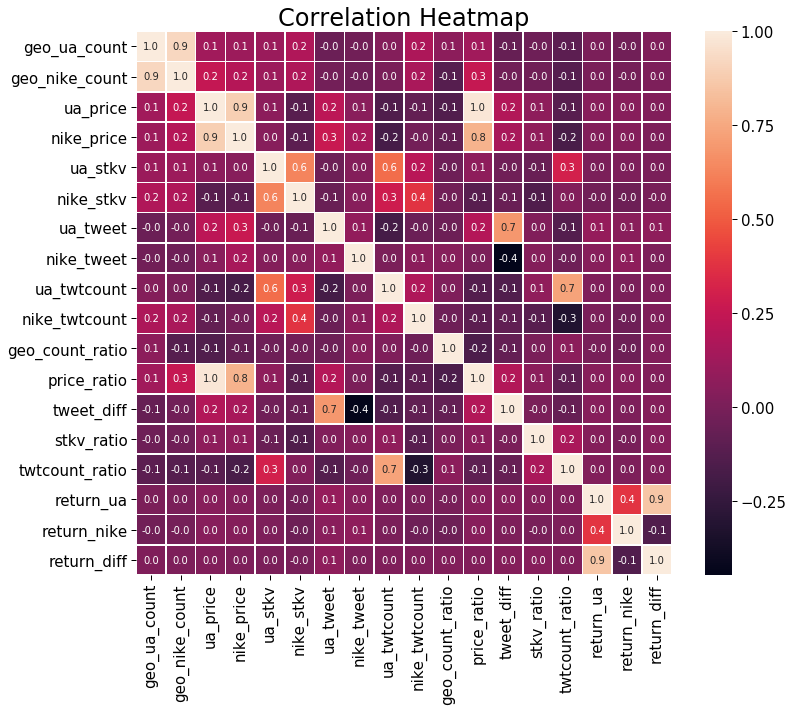

In [60]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.title('Correlation Heatmap', size = 24)
plt.show()

Number of ups:  643
Number of downs :  564


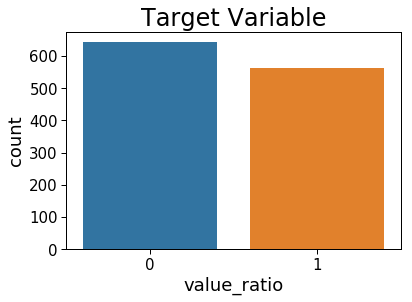

In [61]:
# No need for stratified sampling
ax = sns.countplot(y, label="Count") 
ups, downs = y.value_counts()
plt.title('Target Variable')
print('Number of ups: ', ups)
print('Number of downs : ', downs)

## 4.4 Feature Selection

### 4.4.1 Variance Filtering

In [62]:
threshold = 0.8
vt = VarianceThreshold().fit(X)

feat_var_threshold = X.columns[vt.variances_ > threshold * (1 - threshold)]
feat_var_threshold

Index(['geo_ua_count', 'geo_nike_count', 'ua_price', 'nike_price', 'ua_stkv',
       'nike_stkv', 'ua_twtcount', 'nike_twtcount', 'geo_count_ratio',
       'stkv_ratio', 'twtcount_ratio'],
      dtype='object')

In [63]:
len(feat_var_threshold)

11

### 4.4.2 Importance Ranking

In [64]:
modelr = RandomForestClassifier(random_state = 42)
modelr.fit(X, y)

feature_impr = pd.DataFrame(modelr.feature_importances_, index=X.columns, columns=["importance"])
feat_imp_9r = feature_impr.sort_values("importance", ascending=False).head(9).index
feat_imp_9r

Index(['return_diff', 'return_ua', 'stkv_ratio', 'return_nike', 'ua_stkv',
       'geo_ua_count', 'nike_price', 'geo_count_ratio', 'geo_nike_count'],
      dtype='object')

In [65]:
modela = AdaBoostClassifier(random_state = 42)
modela.fit(X, y)

feature_impa = pd.DataFrame(modela.feature_importances_, index=X.columns, columns=["importance"])
feat_imp_9a = feature_impa.sort_values("importance", ascending=False).head(9).index
feat_imp_9a

Index(['return_diff', 'nike_tweet', 'geo_ua_count', 'nike_price', 'nike_stkv',
       'geo_count_ratio', 'twtcount_ratio', 'return_nike', 'ua_stkv'],
      dtype='object')

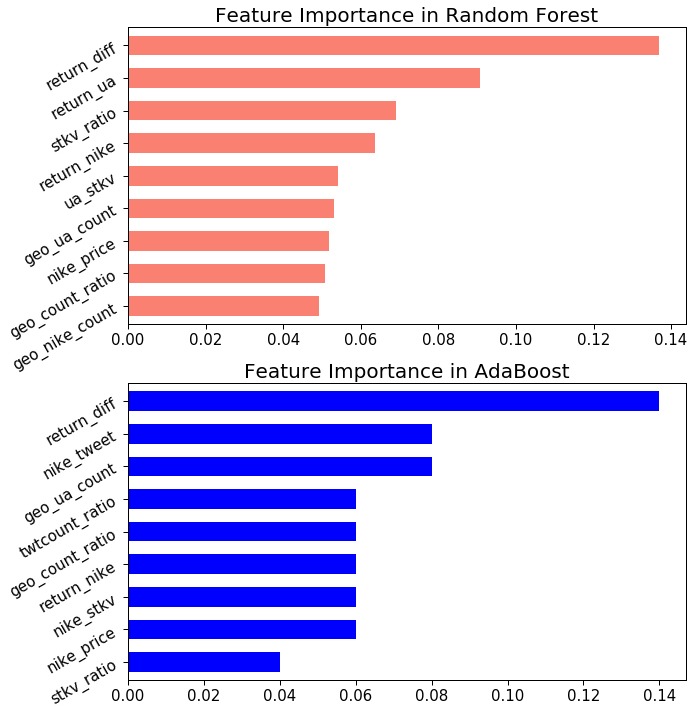

In [66]:
fig, ax = plt.subplots(2, 1, figsize=(10,12))

pd.Series(modelr.feature_importances_, X.columns).sort_values(ascending=True).tail(9).plot.barh(width=0.6, ax=ax[0], color='salmon')
ax[0].set_title('Feature Importance in Random Forest', fontsize=20)
ax[0].tick_params(axis='y', rotation=30)

pd.Series(modela.feature_importances_, X.columns).sort_values(ascending=True).tail(9).plot.barh(width=0.6, ax=ax[1], color='blue')
ax[1].set_title('Feature Importance in AdaBoost', fontsize=20)
ax[1].tick_params(axis='y', rotation=30)

### 4.4.3 SelectKBest with Chi-square

In [67]:
X_minmax = MinMaxScaler().fit_transform(X)
X_scored = SelectKBest(score_func=chi2, k='all').fit(X_minmax, y)
feature_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': X_scored.scores_
    })

feat_scored_9 = feature_scoring.sort_values('score', ascending=False).head(9)['feature'].values
feat_scored_9

array(['return_diff', 'return_ua', 'nike_stkv', 'ua_stkv',
       'nike_twtcount', 'nike_tweet', 'return_nike', 'geo_ua_count',
       'geo_count_ratio'], dtype=object)

### 4.4.4 Recursive Feature Elimination

In [68]:
rfe = RFE(LogisticRegression(), 9)
rfe.fit(X, y)

feature_rfe_scoring = pd.DataFrame({
        'feature': X.columns,
        'score': rfe.ranking_
    })

feat_rfe_9 = feature_rfe_scoring[feature_rfe_scoring['score'] == 1]['feature'].values
feat_rfe_9

array(['ua_tweet', 'nike_tweet', 'geo_count_ratio', 'price_ratio',
       'tweet_diff', 'twtcount_ratio', 'return_ua', 'return_nike',
       'return_diff'], dtype=object)

### 4.4.5 Put All Things Together

In [ ]:
features = np.hstack([
    feat_var_threshold,
    feat_imp_9r, 
    feat_imp_9a,
    feat_scored_9,
    feat_rfe_9
    ])

fc = pd.DataFrame(pd.Series(features).value_counts(), 
                  columns = ['count']).reset_index().rename(columns = {'index':'feature'})
fc

,feature,count
0,geo_count_ratio,5
1,return_nike,4
2,ua_stkv,4
3,geo_ua_count,4
4,return_diff,4
5,nike_stkv,3
6,nike_price,3
7,twtcount_ratio,3
8,return_ua,3
9,nike_tweet,3


In [ ]:
features = fc.feature[fc['count'] > 2].tolist()

print('Final features set:\n')
for f in features:
    print("\t-{}".format(f))

Final features set:

	-geo_count_ratio
	-return_nike
	-ua_stkv
	-geo_ua_count
	-return_diff
	-nike_stkv
	-nike_price
	-twtcount_ratio
	-return_ua
	-nike_tweet


In [ ]:
print(len(features))
X = X.ix[:, features]

10


## 4.5 Modeling

### 4.5.1 Preparation

In [ ]:
random_state = 42
processors = -1
scoring = 'accuracy'
scoring1 = 'roc_auc'
scoring2 = 'f1'
kfold = TimeSeriesSplit(n_splits=10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = random_state)
print('Training set features shape: {}'.format(X_train.shape))
print('Training set target shape: {}'. format((y_train).shape))

Training set features shape: (844, 10)
Training set target shape: (844,)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 4.5.2 Simple Modeling

#### Cross Validation

In [ ]:
classifiers = [
    SVC(random_state = random_state),
    DecisionTreeClassifier(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    KNeighborsClassifier(),
    LogisticRegression(random_state = random_state),
    LDA(), 
    QDA(), 
    GaussianNB(), 
    MLPClassifier(random_state = random_state),
    AdaBoostClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    XGBClassifier(objective = 'binary:logistic', seed = random_state)
]

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring = "accuracy", cv = kfold))

cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cla_names = [
    "Support Vector Machine","Decision Tree","Random Forest","KNeighbors",
    "Logistic Regression","Linear Discriminant Analysis",
    "Quadratic Discriminant Analysis","Naive Bayes",
    "Neural Network","AdaBoosting","Gradient Boosting", "XGBoost"
]
    
cv_res = pd.DataFrame({"Method": cla_names,
                       "CrossValMeans": cv_means,
                       "CrossValerrors": cv_std})

cv_res = cv_res.sort_values(['CrossValMeans'],ascending=False).reset_index(drop=True)
cv_res

,Method,CrossValMeans,CrossValerrors
0,Random Forest,0.656579,0.041796
1,XGBoost,0.638158,0.078563
2,Gradient Boosting,0.636842,0.075173
3,Logistic Regression,0.634211,0.059662
4,Support Vector Machine,0.634211,0.024119
5,Neural Network,0.634211,0.042351
6,Linear Discriminant Analysis,0.631579,0.052302
7,AdaBoosting,0.614474,0.069388
8,KNeighbors,0.609211,0.033313
9,Naive Bayes,0.593421,0.065645


In [ ]:
pl = pd.DataFrame(data = cv_results, index = cla_names)
pl = pl.T
pl.head()

,Support Vector Machine,Decision Tree,Random Forest,KNeighbors,Logistic Regression,Linear Discriminant Analysis,Quadratic Discriminant Analysis,Naive Bayes,Neural Network,AdaBoosting,Gradient Boosting,XGBoost
0,0.618421,0.328947,0.565789,0.592105,0.513158,0.526316,0.460526,0.565789,0.565789,0.473684,0.447368,0.434211
1,0.618421,0.657895,0.671053,0.631579,0.618421,0.592105,0.631579,0.618421,0.644737,0.644737,0.631579,0.710526
2,0.671053,0.631579,0.657895,0.605263,0.710526,0.684211,0.605263,0.644737,0.671053,0.565789,0.697368,0.684211
3,0.671053,0.644737,0.710526,0.618421,0.631579,0.631579,0.657895,0.631579,0.671053,0.671053,0.736842,0.697368
4,0.618421,0.578947,0.671053,0.657895,0.592105,0.605263,0.605263,0.592105,0.592105,0.565789,0.605263,0.618421


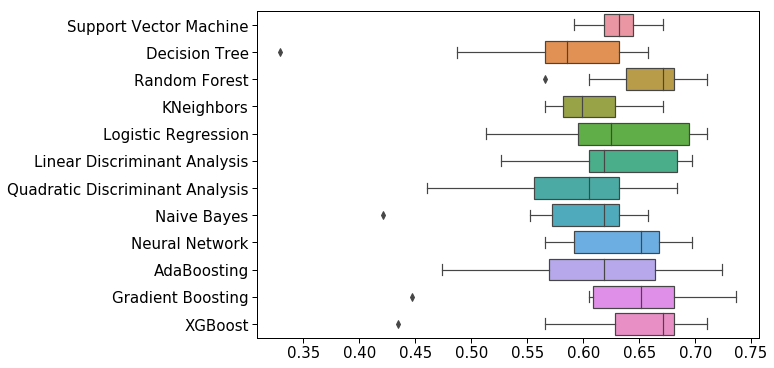

In [ ]:
# Barplot
plt.figure(figsize = (9,6))
sns.boxplot(data = pl, orient = 'h')

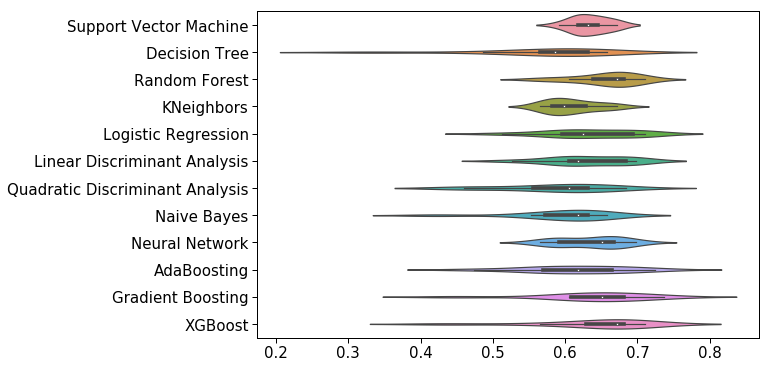

In [ ]:
# ViolinPlot
plt.figure(figsize = (9,6))
sns.violinplot(data = pl, orient = 'h')

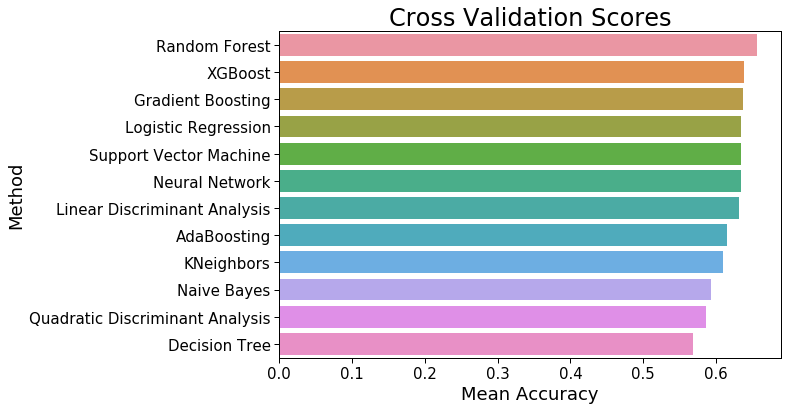

In [ ]:
plt.figure(figsize = (9,6))
sns.barplot("CrossValMeans", "Method", data = cv_res)
plt.xlabel("Mean Accuracy")
plt.title("Cross Validation Scores")
plt.show()

#### Using Testing Set

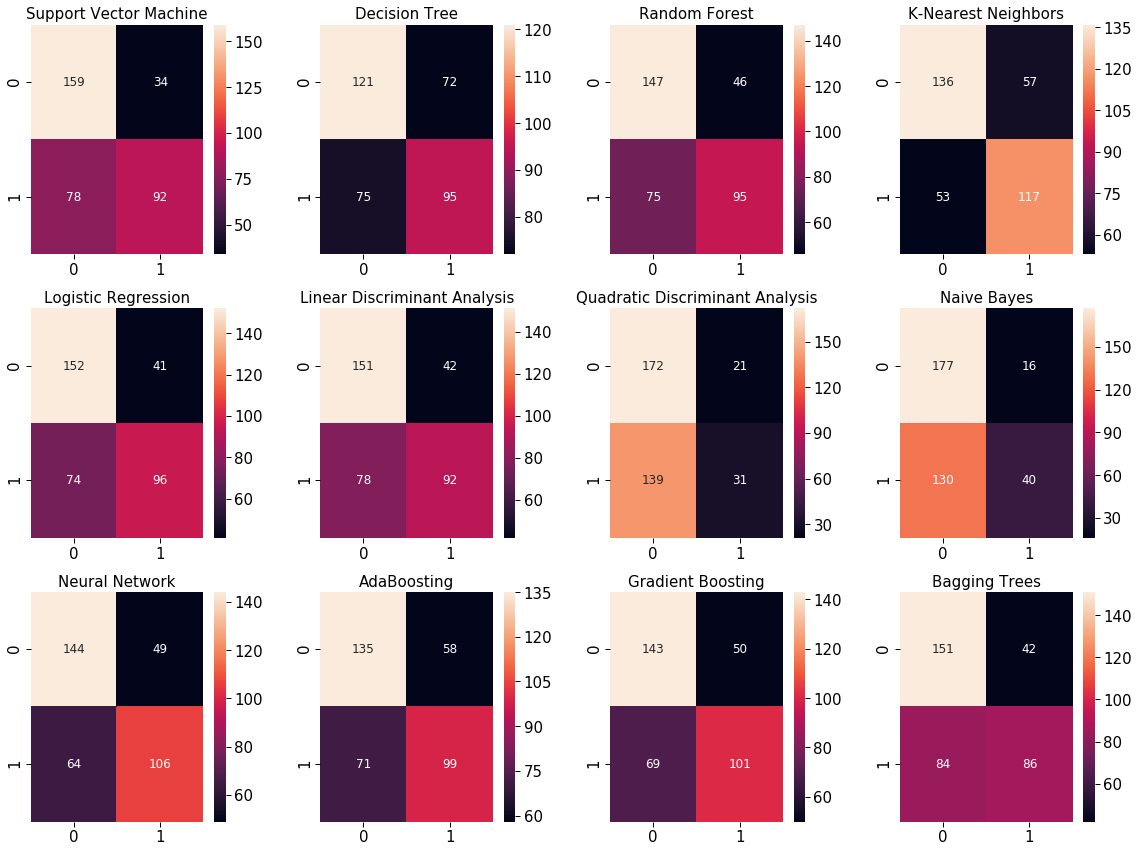

In [ ]:
# Confusion Matrix
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":15,"axes.labelsize":15,"xtick.labelsize":15,"ytick.labelsize":15})

f, ax = plt.subplots(3,4,figsize=(16,12))

acc=[]

model=SVC(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,0],annot=True,fmt='d')
ax[0,0].set_title('Support Vector Machine')

cart=DecisionTreeClassifier(random_state = random_state)
model=cart
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,1],annot=True,fmt='d')
ax[0,1].set_title('Decision Tree')

model=RandomForestClassifier(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,2],annot=True,fmt='d')
ax[0,2].set_title('Random Forest')

model=KNeighborsClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[0,3],annot=True,fmt='d')
ax[0,3].set_title('K-Nearest Neighbors')

model=LogisticRegression(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,0],annot=True,fmt='d')
ax[1,0].set_title('Logistic Regression')

model=LDA()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,1],annot=True,fmt='d')
ax[1,1].set_title('Linear Discriminant Analysis')

model=QDA()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,2],annot=True,fmt='d')
ax[1,2].set_title('Quadratic Discriminant Analysis')

model=GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[1,3],annot=True,fmt='d')
ax[1,3].set_title('Naive Bayes')

model=MLPClassifier(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,0],annot=True,fmt='d')
ax[2,0].set_title('Neural Network')

model=AdaBoostClassifier(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,1],annot=True,fmt='d')
ax[2,1].set_title('AdaBoosting')

model=GradientBoostingClassifier(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,2],annot=True,fmt='d')
ax[2,2].set_title('Gradient Boosting')

model=BaggingClassifier(random_state = random_state)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
acc.append(accuracy_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),ax=ax[2,3],annot=True,fmt='d')
ax[2,3].set_title('Bagging Trees')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.tight_layout()
plt.show()

In [ ]:
accdf = pd.DataFrame({"Accuracy":acc,
                      "Algorithm":["SVM","DT","RF","KNN",
                                   "LR","LDA",
                                   "QDA","NB","NN",
                                   "Ada","GBDT","Bagging"]})

accdf = accdf.sort_values(['Accuracy'],ascending=False).reset_index(drop=True)
accdf

,Accuracy,Algorithm
0,0.696970,KNN
1,0.691460,SVM
2,0.688705,NN
3,0.683196,LR
4,0.672176,GBDT
5,0.669421,LDA
6,0.666667,RF
7,0.652893,Bagging
8,0.644628,Ada
9,0.597796,NB


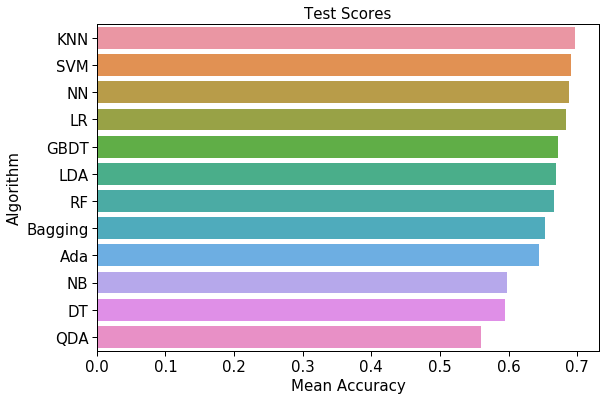

In [ ]:
plt.figure(figsize = (9,6))
sns.barplot("Accuracy", "Algorithm", data = accdf)
plt.xlabel("Mean Accuracy")
plt.title("Test Scores")
plt.show()

## 5. Using 3 Performance Evaluation Methods

### 5.1 For Accuracy as Scoring Metric

#### Hyperparameter Tuning

In [ ]:
lr_grid = GridSearchCV(
    estimator = LogisticRegression(random_state=random_state),
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.001,0.01, 0.1]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

lr_grid.fit(X_train, y_train)

print("Logistic:")
print("="*30)
print(lr_grid.best_score_)
print(lr_grid.best_params_)

Logistic:
0.6473684210526316
{'C': 0.001, 'penalty': 'l2'}


In [ ]:
lda_grid = GridSearchCV(
    estimator = LDA(),
    param_grid = {
        'solver': ['svd', 'lsqr'],
        'n_components': [None, 2, 5]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

lda_grid.fit(X_train, y_train)

print("Linear Discriminant Analysis:")
print("="*30)
print(lda_grid.best_score_)
print(lda_grid.best_params_)

Linear Discriminant Analysis:
0.631578947368421
{'n_components': None, 'solver': 'svd'}


In [ ]:
qda_grid = GridSearchCV(
    estimator = QDA(),
    param_grid = {
        'priors': [None, 0, 1],
        'reg_param': [0.2, 0.3, 0.4]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

qda_grid.fit(X_train, y_train)

print("Quadratic Discriminant Analysis:")
print("="*30)
print(qda_grid.best_score_)
print(qda_grid.best_params_)

Quadratic Discriminant Analysis:
0.6394736842105263
{'priors': 1, 'reg_param': 0.4}


In [ ]:
bag_grid = RandomizedSearchCV(
    estimator = BaggingClassifier(base_estimator=cart, warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [200, 500, 1000],
        'max_samples': [0.1, 0.3, 0.5],
        'max_features': [0.3, 0.5, 0.7]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

bag_grid.fit(X_train, y_train)

print("Bagging Trees:")
print("="*30)
print(bag_grid.best_score_)
print(bag_grid.best_params_)

Bagging Trees:
0.6644736842105263
{'n_estimators': 200, 'max_samples': 0.3, 'max_features': 0.7}


In [ ]:
rf_grid = RandomizedSearchCV(
    estimator = RandomForestClassifier(warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [6, 8, 10],
        'max_features': ['sqrt', 'log2']
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

rf_grid.fit(X_train, y_train)

print("Random Forest:")
print("="*30)
print(rf_grid.best_score_)
print(rf_grid.best_params_)

Random Forest:
0.6526315789473685
{'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}


In [ ]:
ada_grid = RandomizedSearchCV(
    estimator = AdaBoostClassifier(random_state=random_state),
    param_distributions = {
        'algorithm': ['SAMME', 'SAMME.R'],
        'n_estimators': [200, 500, 1000],
        'learning_rate': [0.001, 0.01, 0.1]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

ada_grid.fit(X_train, y_train)

print("Adaboost:")
print("="*30)
print(ada_grid.best_score_)
print(ada_grid.best_params_)

Adaboost:
0.6592105263157895
{'n_estimators': 1000, 'learning_rate': 0.001, 'algorithm': 'SAMME'}


In [ ]:
gbm_grid = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [100, 200, 500],
        'max_depth': [8, 10, 12],
        'max_features': [0.1, 0.3, 0.5],
        'learning_rate': [0.01, 0.1, 1]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

gbm_grid.fit(X_train, y_train)

print("Gradiant Boosting Machine:")
print("="*30)
print(gbm_grid.best_score_)
print(gbm_grid.best_params_)

Gradiant Boosting Machine:
0.6486842105263158
{'n_estimators': 100, 'max_features': 0.1, 'max_depth': 10, 'learning_rate': 0.1}


In [ ]:
xgb_grid = RandomizedSearchCV(
    estimator = XGBClassifier(objective = 'binary:logistic', seed = random_state), 
    param_distributions = {
    'learning_rate': [0.01, 0.1, 1], 
    'n_estimators': [50, 100, 200],
    'subsample': [0.1, 0.3, 0.5]
}, 
    n_iter = 10, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors,
    verbose = False) 

xgb_grid.fit(X_train, y_train)

print("XGBoost:")
print("="*30)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

XGBoost:
0.6552631578947369
{'subsample': 0.3, 'n_estimators': 100, 'learning_rate': 0.01}


#### StackingClassifier

In [ ]:
# create sub models according to the best models above
clf1 = LogisticRegression(penalty='l2', C=0.001)
clf2 = LDA(solver = 'svd', n_components = None)
clf3 = QDA(priors = None, reg_param = 0.3)
clf4 = BaggingClassifier(base_estimator=cart, n_estimators=500, max_samples=0.3, max_features=0.5, warm_start=True, random_state=random_state)
clf5 = RandomForestClassifier( n_estimators=50, max_features='log2', max_depth=8, criterion='entropy', warm_start=True, random_state=random_state)
clf6 = AdaBoostClassifier(n_estimators=1000, learning_rate=0.001, algorithm='SAMME.R')
clf7 = GradientBoostingClassifier(n_estimators=100, max_features=0.3, max_depth=8, learning_rate=0.1, warm_start=True, random_state=random_state)
clf8 = XGBClassifier(objective='binary:logistic', subsample=0.3, n_estimators=50, learning_rate=0.01, random_state=random_state)

lr = LogisticRegression()

sclf = StackingClassifier(classifiers = [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8], 
                          use_probas = True, average_probas = False,
                          meta_classifier = lr)

print('10-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, sclf], 
                      ['LR', 
                       'LDA', 
                       'QDA',
                       'Bagging Trees',
                       'Random Forest',
                       'Adaboost',
                       'GBM',
                       'XGBoost',
                       'Stacking']):

    scores = cross_val_score(clf, X_train, y_train, cv = kfold, scoring = scoring)
    print("ACC: %0.3f (+/- %0.3f) [%s]" 
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ACC: 0.647 (+/- 0.038) [LR]
ACC: 0.632 (+/- 0.052) [LDA]
ACC: 0.628 (+/- 0.055) [QDA]
ACC: 0.649 (+/- 0.042) [Bagging Trees]
ACC: 0.647 (+/- 0.054) [Random Forest]
ACC: 0.658 (+/- 0.064) [Adaboost]
ACC: 0.629 (+/- 0.082) [GBM]
ACC: 0.655 (+/- 0.047) [XGBoost]
ACC: 0.629 (+/- 0.078) [Stacking]


#### VotingClassifier

In [ ]:
# Create sub models
estimators = [
    ('lr',clf1),
    ('lda',clf2),
    ('qda',clf3),
    ('bag',clf4),
    ('rf',clf5),
    ('ada',clf6),
    ('gbm',clf7),
    ('xgb',clf8)
]

# Create the ensemble model
ensemble = VotingClassifier(estimators, voting = 'soft')
results = cross_val_score(ensemble, X_train, y_train, cv = kfold, scoring = scoring, n_jobs = processors)

print("Ensemble:")
print("="*30)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

Ensemble:
(0.654) +/- (0.060)


### 5.2 For ROC/AUC as Scoring Metric

#### Hyperparameter Tuning

In [ ]:
lr_grid1 = GridSearchCV(
    estimator = LogisticRegression(random_state=random_state),
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.0001,0.001,0.01]
    }, 
    cv = kfold, 
    scoring = scoring1, 
    n_jobs = processors)

lr_grid1.fit(X_train, y_train)

print("Logistic:")
print("="*30)
print(lr_grid1.best_score_)
print(lr_grid1.best_params_)

Logistic:
0.7000953932692359
{'C': 0.001, 'penalty': 'l2'}


In [ ]:
lda_grid1 = GridSearchCV(
    estimator = LDA(),
    param_grid = {
        'solver': ['svd', 'lsqr'],
        'n_components': [None, 2, 5]
    }, 
    cv = kfold, 
    scoring = scoring1, 
    n_jobs = processors)

lda_grid1.fit(X_train, y_train)

print("Linear Discriminant Analysis:")
print("="*30)
print(lda_grid1.best_score_)
print(lda_grid1.best_params_)

Linear Discriminant Analysis:
0.6882882899856216
{'n_components': None, 'solver': 'svd'}


In [ ]:
qda_grid1 = GridSearchCV(
    estimator = QDA(),
    param_grid = {
        'priors': [None, 0, 1],
        'reg_param': [0.1, 0.2, 0.3]
    }, 
    cv = kfold, 
    scoring = scoring, 
    n_jobs = processors)

qda_grid1.fit(X_train, y_train)

print("Quadratic Discriminant Analysis:")
print("="*30)
print(qda_grid1.best_score_)
print(qda_grid1.best_params_)

Quadratic Discriminant Analysis:
0.6328947368421053
{'priors': 1, 'reg_param': 0.3}


In [ ]:
bag_grid1 = RandomizedSearchCV(
    estimator = BaggingClassifier(base_estimator=cart, warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [100, 200, 500],
        'max_samples': [0.1, 0.3, 0.5],
        'max_features': [0.3, 0.5, 0.7]
    }, 
    cv = kfold, 
    scoring = scoring1, 
    n_jobs = processors)

bag_grid1.fit(X_train, y_train)

print("Bagging Trees:")
print("="*30)
print(bag_grid1.best_score_)
print(bag_grid1.best_params_)

Bagging Trees:
0.7095328010930916
{'n_estimators': 500, 'max_samples': 0.3, 'max_features': 0.7}


In [ ]:
rf_grid1 = RandomizedSearchCV(
    estimator = RandomForestClassifier(warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [6, 8, 10],
        'max_features': ['sqrt', 'log2']
    }, 
    cv = kfold, 
    scoring = scoring1, 
    n_jobs = processors)

rf_grid1.fit(X_train, y_train)

print("Random Forest:")
print("="*30)
print(rf_grid1.best_score_)
print(rf_grid1.best_params_)

Random Forest:
0.7106423465811759
{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 6, 'criterion': 'entropy'}


In [ ]:
ada_grid1 = RandomizedSearchCV(
    estimator = AdaBoostClassifier(random_state=random_state),
    param_distributions = {
        'algorithm': ['SAMME', 'SAMME.R'],
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.1, 0.5, 1]
    }, 
    cv = kfold, 
    scoring = scoring1, 
    n_jobs = processors)

ada_grid1.fit(X_train, y_train)

print("Adaboost:")
print("="*30)
print(ada_grid1.best_score_)
print(ada_grid1.best_params_)

Adaboost:
0.7060879056321813
{'n_estimators': 200, 'learning_rate': 0.1, 'algorithm': 'SAMME'}


In [ ]:
gbm_grid1 = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [50, 100, 200],
        'max_depth': [4, 6, 8],
        'max_features': [0.1, 0.3, 0.5],
        'learning_rate': [0.01, 0.1, 1]
    }, 
    cv = kfold, 
    scoring = scoring1, 
    n_jobs = processors)

gbm_grid1.fit(X_train, y_train)

print("Gradiant Boosting Machine:")
print("="*30)
print(gbm_grid1.best_score_)
print(gbm_grid1.best_params_)

Gradiant Boosting Machine:
0.7045259803029289
{'n_estimators': 50, 'max_features': 0.1, 'max_depth': 4, 'learning_rate': 0.01}


In [ ]:
xgb_grid1 = RandomizedSearchCV(
    estimator = XGBClassifier(objective = 'binary:logistic', seed = random_state), 
    param_distributions = {
    'learning_rate': [0.01, 0.1, 1], 
    'n_estimators': [200, 500, 1000],
    'subsample': [0.1, 0.3, 0.5]
}, 
    n_iter = 10, 
    cv = kfold, 
    scoring = scoring1, 
    n_jobs = processors,
    verbose = False) 

xgb_grid1.fit(X_train, y_train)

print("XGBoost:")
print("="*30)
print(xgb_grid1.best_score_)
print(xgb_grid1.best_params_)

XGBoost:
0.7077050233264637
{'subsample': 0.5, 'n_estimators': 200, 'learning_rate': 0.01}


#### StackingClassifier

In [ ]:
clf11 = LogisticRegression(penalty='l2', C=0.0001)
clf21 = LDA(solver = 'svd', n_components = None)
clf31 = QDA(priors = None, reg_param = 0.3)
clf41 = BaggingClassifier(base_estimator=cart, n_estimators=200, max_samples=0.1, max_features=0.3, warm_start=True, random_state=random_state)
clf51 = RandomForestClassifier( n_estimators=50, max_features='sqrt', max_depth=6, criterion='entropy', warm_start=True, random_state=random_state)
clf61 = AdaBoostClassifier(n_estimators=200, learning_rate=0.5, algorithm='SAMME')
clf71 = GradientBoostingClassifier(n_estimators=50, max_features=0.3, max_depth=4, learning_rate=0.1, warm_start=True, random_state=random_state)
clf81 = XGBClassifier(objective='binary:logistic', subsample=0.1, n_estimators=200, learning_rate=0.01, random_state=random_state)


lr = LogisticRegression()

sclf1 = StackingClassifier(classifiers = [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8], 
                          use_probas = True, average_probas = False,
                          meta_classifier = lr)

print('10-fold cross validation:\n')

for clf, label in zip([clf11, clf21, clf31, clf41, clf51, clf61, clf71, clf81, sclf1], 
                      ['LR', 
                       'LDA', 
                       'QDA',
                       'Bagging Trees',
                       'Random Forest',
                       'Adaboost',
                       'GBM',
                       'XGBoost',
                       'Stacking']):

    scores = cross_val_score(clf, X_train, y_train, cv = kfold, scoring = scoring1)
    print("AUC: %0.3f (+/- %0.3f) [%s]" 
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

AUC: 0.699 (+/- 0.038) [LR]
AUC: 0.688 (+/- 0.047) [LDA]
AUC: 0.690 (+/- 0.049) [QDA]
AUC: 0.692 (+/- 0.053) [Bagging Trees]
AUC: 0.707 (+/- 0.076) [Random Forest]
AUC: 0.692 (+/- 0.079) [Adaboost]
AUC: 0.687 (+/- 0.089) [GBM]
AUC: 0.695 (+/- 0.058) [XGBoost]
AUC: 0.689 (+/- 0.088) [Stacking]


#### VotingClassifier

In [ ]:
# Create sub models
estimators = [
    ('lr',clf11),
    ('lda',clf21),
    ('qda',clf31),
    ('bag',clf41),
    ('rf',clf51),
    ('ada',clf61),
    ('gbm',clf71),
    ('xgb',clf81)
]

# Create the ensemble model
ensemble1 = VotingClassifier(estimators, voting = 'soft')
results = cross_val_score(ensemble, X_train, y_train, cv = kfold, scoring = scoring1, n_jobs = processors)

print("Ensemble:")
print("="*30)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

Ensemble:
(0.704) +/- (0.071)


### 5.3 For F1 as Scoring Metric

#### Hyperparameter Tuning

In [ ]:
lr_grid2 = GridSearchCV(
    estimator = LogisticRegression(random_state=random_state),
    param_grid = {
        'penalty': ['l1', 'l2'],
        'C': [0.0001,0.001,0.01]
    }, 
    cv = kfold, 
    scoring = scoring2, 
    n_jobs = processors)

lr_grid2.fit(X_train, y_train)

print("Logistic:")
print("="*30)
print(lr_grid2.best_score_)
print(lr_grid2.best_params_)

Logistic:
0.597888035605067
{'C': 0.0001, 'penalty': 'l2'}


In [ ]:
lda_grid2 = GridSearchCV(
    estimator = LDA(),
    param_grid = {
        'solver': ['svd', 'lsqr'],
        'n_components': [None, 2, 5]
    }, 
    cv = kfold, 
    scoring = scoring2, 
    n_jobs = processors)

lda_grid2.fit(X_train, y_train)

print("Linear Discriminant Analysis:")
print("="*30)
print(lda_grid2.best_score_)
print(lda_grid2.best_params_)

Linear Discriminant Analysis:
0.5634506918603219
{'n_components': None, 'solver': 'svd'}


In [ ]:
qda_grid2 = GridSearchCV(
    estimator = QDA(),
    param_grid = {
        'priors': [None, 0, 1],
        'reg_param': [0, 0.1, 0.2]
    }, 
    cv = kfold, 
    scoring = scoring2, 
    n_jobs = processors)

qda_grid2.fit(X_train, y_train)

print("Quadratic Discriminant Analysis:")
print("="*30)
print(qda_grid2.best_score_)
print(qda_grid2.best_params_)

Quadratic Discriminant Analysis:
0.4803829994455372
{'priors': 1, 'reg_param': 0}


In [ ]:
bag_grid2 = RandomizedSearchCV(
    estimator = BaggingClassifier(base_estimator=cart, warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [100, 200, 500],
        'max_samples': [0.1, 0.3, 0.5],
        'max_features': [0.4, 0.6, 0.8]
    }, 
    cv = kfold, 
    scoring = scoring2, 
    n_jobs = processors)

bag_grid2.fit(X_train, y_train)

print("Bagging Trees:")
print("="*30)
print(bag_grid2.best_score_)
print(bag_grid2.best_params_)

Bagging Trees:
0.6155844779549784
{'n_estimators': 100, 'max_samples': 0.5, 'max_features': 0.8}


In [ ]:
rf_grid2 = RandomizedSearchCV(
    estimator = RandomForestClassifier(warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [100, 200, 500],
        'criterion': ['gini', 'entropy'],
        'max_depth': [8, 10, 12],
        'max_features': ['sqrt', 'log2']
    }, 
    cv = kfold, 
    scoring = scoring2, 
    n_jobs = processors)

rf_grid2.fit(X_train, y_train)

print("Random Forest:")
print("="*30)
print(rf_grid2.best_score_)
print(rf_grid2.best_params_)

Random Forest:
0.6119651104760849
{'n_estimators': 200, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'}


In [ ]:
ada_grid2 = RandomizedSearchCV(
    estimator = AdaBoostClassifier(random_state=random_state),
    param_distributions = {
        'algorithm': ['SAMME', 'SAMME.R'],
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.1, 0.5, 1]
    }, 
    cv = kfold, 
    scoring = scoring2, 
    n_jobs = processors)

ada_grid2.fit(X_train, y_train)

print("Adaboost:")
print("="*30)
print(ada_grid2.best_score_)
print(ada_grid2.best_params_)

Adaboost:
0.6036984921776484
{'n_estimators': 200, 'learning_rate': 0.5, 'algorithm': 'SAMME'}


In [ ]:
gbm_grid2 = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(warm_start=True, random_state=random_state),
    param_distributions = {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5],
        'max_features': [0.1, 0.3, 0.5],
        'learning_rate': [0.01, 0.1, 1]
    }, 
    cv = kfold, 
    scoring = scoring2, 
    n_jobs = processors)

gbm_grid2.fit(X_train, y_train)

print("Gradiant Boosting Machine:")
print("="*30)
print(gbm_grid2.best_score_)
print(gbm_grid2.best_params_)

Gradiant Boosting Machine:
0.6152198731781332
{'n_estimators': 50, 'max_features': 0.5, 'max_depth': 4, 'learning_rate': 0.1}


In [ ]:
xgb_grid2 = RandomizedSearchCV(
    estimator = XGBClassifier(objective = 'binary:logistic', seed = random_state), 
    param_distributions = {
    'learning_rate': [0.01, 0.1, 1], 
    'n_estimators': [200, 500, 1000],
    'subsample': [0.1, 0.3, 0.5]
}, 
    n_iter = 10, 
    cv = kfold, 
    scoring = scoring2, 
    n_jobs = processors,
    verbose = False) 

xgb_grid2.fit(X_train, y_train)

print("XGBoost:")
print("="*30)
print(xgb_grid2.best_score_)
print(xgb_grid2.best_params_)

XGBoost:
0.6196620879120879
{'subsample': 0.5, 'n_estimators': 200, 'learning_rate': 0.01}


### 4.5.4 Stacking & Voting

#### StackingClassifier

In [ ]:
clf12 = LogisticRegression(penalty='l2', C=0.0001)
clf22 = LDA(solver = 'svd', n_components = None)
clf32 = QDA(priors = 1, reg_param = 0)
clf42 = BaggingClassifier(base_estimator=cart, n_estimators=200, max_samples=0.5, max_features=0.6, warm_start=True, random_state=random_state)
clf52 = RandomForestClassifier( n_estimators=100, max_features='sqrt', max_depth=8, criterion='entropy', warm_start=True, random_state=random_state)
clf62 = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, algorithm='SAMME.R')
clf72 = GradientBoostingClassifier(n_estimators=200, max_features=0.5, max_depth=5, learning_rate=0.1, warm_start=True, random_state=random_state)
clf82 = XGBClassifier(objective='binary:logistic', subsample=0.3, n_estimators=200, learning_rate=0.01, random_state=random_state)


lr = LogisticRegression()

sclf2 = StackingClassifier(classifiers=[clf12, clf22, clf32, clf42, clf52, clf62, clf72, clf82], 
                          use_probas=True, average_probas=False,
                          meta_classifier=lr)

print('10-fold cross validation:\n')

for clf, label in zip([clf12, clf22, clf32, clf42, clf52, clf62, clf72, clf82, sclf2], 
                      ['LR', 
                       'LDA', 
                       'QDA',
                       'Bagging Trees',
                       'Random Forest',
                       'Adaboost',
                       'GBM',
                       'XGBoost',
                       'Stacking']):

    scores = cross_val_score(clf, X_train, y_train, cv = kfold, scoring = scoring2)
    print("F1: %0.3f (+/- %0.3f) [%s]" 
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

F1: 0.598 (+/- 0.048) [LR]
F1: 0.563 (+/- 0.056) [LDA]
F1: 0.472 (+/- 0.113) [QDA]
F1: 0.590 (+/- 0.076) [Bagging Trees]
F1: 0.596 (+/- 0.059) [Random Forest]
F1: 0.609 (+/- 0.064) [Adaboost]
F1: 0.599 (+/- 0.088) [GBM]
F1: 0.612 (+/- 0.061) [XGBoost]
F1: 0.608 (+/- 0.089) [Stacking]


#### VotingClassifier

In [ ]:
# Create sub models
estimators = [
    ('lr',clf12),
    ('lda',clf22),
    ('qda',clf32),
    ('bag',clf42),
    ('rf',clf52),
    ('ada',clf62),
    ('gbm',clf72),
    ('xgb',clf82)
]

# Create the ensemble model
ensemble2 = VotingClassifier(estimators, voting = 'soft')
results = cross_val_score(ensemble, X_train, y_train, cv = kfold, scoring = scoring2, n_jobs = processors)

print("Ensemble:")
print("="*30)
print("({0:.3f}) +/- ({1:.3f})".format(results.mean(), results.std()))

Ensemble:
(0.592) +/- (0.079)


### 4.5 Conclusion (Using Test Data & 3 Best Models)

In [ ]:
models = [ensemble, ensemble1, ensemble2]
accuracy = []

for mod in models:
    mod.fit(X_train, y_train)
    preds_test = model.predict(X_test)
    accuracy.append(float(np.sum(preds_test == y_test)) / pd.Series(y_test).shape[0])

for i in range(3):
    print("Accuracy"+ str(i+1) +": ", round(accuracy[i], 3))

Accuracy1:  0.653
Accuracy2:  0.653
Accuracy3:  0.653


In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.612492
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            value_ratio   No. Observations:                 1207
Model:                          Logit   Df Residuals:                     1198
Method:                           MLE   Df Model:                            8
Date:                Wed, 19 Jun 2019   Pseudo R-squ.:                  0.1136
Time:                        10:51:45   Log-Likelihood:                -739.28
converged:                       True   LL-Null:                       -834.04
                                        LLR p-value:                 1.024e-36
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
geo_count_ratio     0.0560      0.065      0.858      0.391      -0.072       0.184
return_nike   

In [ ]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
sequence_length = 28
input_size = 28
hidden_size = 128
num_layers = 2
num_classes = 10
batch_size = 100
num_epochs = 2
learning_rate = 0.01

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

# Recurrent neural network (many-to-one)
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Set initial hidden and cell states 
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

model = RNN(input_size, hidden_size, num_layers, num_classes).to(device)


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total)) 

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')